<a href="https://colab.research.google.com/github/Jmerinom22/Guardados_prueba/blob/main/Datos_(Analisis_Exploratorio_%2B_Inplementacion_XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Métrica                                   | Significado                                                   | Lo ideal es que... |
| ----------------------------------------- | ------------------------------------------------------------- | ------------------ |
| **RMSE** (Root Mean Squared Error)        | Error promedio al cuadrado. Penaliza más los errores grandes. | Sea **bajo**.      |
| **MAE** (Mean Absolute Error)             | Promedio del valor absoluto del error. Más intuitivo.         | Sea **bajo**.      |
| **MAPE** (Mean Absolute Percentage Error) | Error porcentual promedio. Se expresa como %.                 | Sea **bajo**.      |

--------------------------------------------------------

| Métrica                                    | Significado                                               | Lo ideal es que...          |
| ------------------------------------------ | --------------------------------------------------------- | --------------------------- |
| **\$R^2\$ (Coeficiente de determinación)** | Mide cuánta variabilidad del dato real explica el modelo. | Sea lo más **cercano a 1**. |


# Descarga de los datos

In [ ]:
import requests
import pandas as pd

# === 1. PARÁMETROS DEL PROYECTO ===

# Coordenadas del lugar: La Paz, Cesar, Colombia
latitude = 10.3844
longitude = -73.1733

# Fechas de descarga
start_date = "2025-02-01"
end_date = "2025-05-31"

# Variables por hora que queremos
variables = [
    "shortwave_radiation",     # Radiación solar (W/m²)
    "temperature_2m",          # Temperatura (°C)
    "wind_speed_10m",          # Velocidad del viento (m/s)
    "relative_humidity_2m"     # Humedad relativa (%)
]

# === 2. LLAMADO A LA API ===

base_url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": ",".join(variables),
    "timezone": "America/Bogota"
}

print("Descargando datos desde Open-Meteo...")
response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data["hourly"])
    print("✅ Datos descargados correctamente.")
else:
    print("❌ Error en la solicitud:", response.status_code)
    exit()

# === 3. CÁLCULO DE ENERGÍA SOLAR ESTIMADA ===

# Parámetros técnicos del sistema solar
area_panel = 1.6        # m² por panel
eficiencia = 0.20       # 20%
perdidas = 0.15         # 15%
factor = eficiencia * (1 - perdidas)

# Nueva columna con energía estimada en kWh
df["energia_solar_kWh"] = (df["shortwave_radiation"] * area_panel * factor) / 1000

# === 4. GUARDAR CSV ===

# Nombre del archivo de salida
nombre_archivo = "base_datos_solar_lapaz_2025.csv"
df.to_csv(nombre_archivo, index=False)
print(f"💾 Archivo guardado como '{nombre_archivo}' en el directorio actual.")


Descargando datos desde Open-Meteo...
✅ Datos descargados correctamente.
💾 Archivo guardado como 'base_datos_solar_lapaz_2025.csv' en el directorio actual.


In [ ]:
from google.colab import files

# Descargar el archivo al computador
files.download('base_datos_solar_lapaz_2025.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cargar Base de datos

In [ ]:
import pandas as pd
from google.colab import files

# 📂 Subir archivo manualmente
uploaded = files.upload()

# 📌 Cargar el archivo (usando el primer archivo subido)
archivo = list(uploaded.keys())[0]
df = pd.read_csv(archivo, sep=';')  # Asegúrate de usar el separador correcto

# 📊 Número de observaciones y variables
num_observaciones, num_variables = df.shape
print(f"📈 Número de observaciones (filas): {num_observaciones}")
print(f"🧮 Número de variables (columnas): {num_variables}")

# 🧾 Nombres de las variables
print("\n📋 Lista de variables:")
print(df.columns.tolist())

Saving base_datos_solar_lapaz_2025 (1).csv to base_datos_solar_lapaz_2025 (1) (1).csv
📈 Número de observaciones (filas): 2880
🧮 Número de variables (columnas): 6

📋 Lista de variables:
['time', 'shortwave_radiation', 'temperature_2m', 'wind_speed_10m', 'relative_humidity_2m', 'energia_solar_kWh']


# Análisis Descriptivo para Machine Learning

## 1. Análisis de la Estructura de los Datos

In [ ]:
# Seleccionar solo las variables numéricas
numericas = df.select_dtypes(include=["float64", "int64"])

# Tabla 1: Medidas de tendencia central
tendencia_central = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median()
})
print("📌 Medidas de Tendencia Central:")
display(tendencia_central)

# Tabla 2: Medidas de dispersión
dispersion = pd.DataFrame({
    'Desviación estándar': numericas.std(),
    'Rango': numericas.max() - numericas.min(),
    'IQR (Rango intercuartílico)': numericas.quantile(0.75) - numericas.quantile(0.25)
})
print("📌 Medidas de Dispersión:")
display(dispersion)

# Tabla 3: Valores mínimos y máximos
min_max = pd.DataFrame({
    'Mínimo': numericas.min(),
    'Máximo': numericas.max()
})
print("📌 Valores Mínimos y Máximos:")
display(min_max)

# Tabla 4: Percentiles (25, 50, 75)
percentiles = numericas.quantile([0.25, 0.50, 0.75]).T
percentiles.columns = ['P25', 'P50', 'P75']
print("📌 Percentiles:")
percentiles

📌 Medidas de Tendencia Central:


Media    Mediana
shortwave_radiation   249.016319  16.000000
temperature_2m         28.757882  27.900000
wind_speed_10m         12.382986  12.800000
relative_humidity_2m   63.139583  65.000000
energia_solar_kWh       0.067732   0.004352

📌 Medidas de Dispersión:


Desviación estándar      Rango  \
shortwave_radiation            322.309183  995.00000   
temperature_2m                   3.451357   14.80000   
wind_speed_10m                   6.571516   30.30000   
relative_humidity_2m            15.158396   75.00000   
energia_solar_kWh                0.087668    0.27064   

                      IQR (Rango intercuartílico)  
shortwave_radiation                    518.500000  
temperature_2m                           5.500000  
wind_speed_10m                          10.425000  
relative_humidity_2m                    21.000000  
energia_solar_kWh                        0.141032

📌 Valores Mínimos y Máximos:


Mínimo     Máximo
shortwave_radiation      0.0  995.00000
temperature_2m          22.7   37.50000
wind_speed_10m           0.0   30.30000
relative_humidity_2m    25.0  100.00000
energia_solar_kWh        0.0    0.27064

📌 Percentiles:


P25        P50         P75
shortwave_radiation    0.0  16.000000  518.500000
temperature_2m        25.9  27.900000   31.400000
wind_speed_10m         6.9  12.800000   17.325000
relative_humidity_2m  53.0  65.000000   74.000000
energia_solar_kWh      0.0   0.004352    0.141032

In [ ]:
# 1. Porcentaje de valores faltantes por variable
faltantes = df.isnull().sum()
porcentaje = (faltantes / len(df)) * 100
faltantes_df = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Porcentaje (%)': porcentaje.round(2)
})

# Mostrar la tabla
print("📌 Porcentaje de Valores Faltantes por Variable:")
display(faltantes_df)

📌 Porcentaje de Valores Faltantes por Variable:


Valores Faltantes  Porcentaje (%)
time                                  0             0.0
shortwave_radiation                   0             0.0
temperature_2m                        0             0.0
wind_speed_10m                        0             0.0
relative_humidity_2m                  0             0.0
energia_solar_kWh                     0             0.0

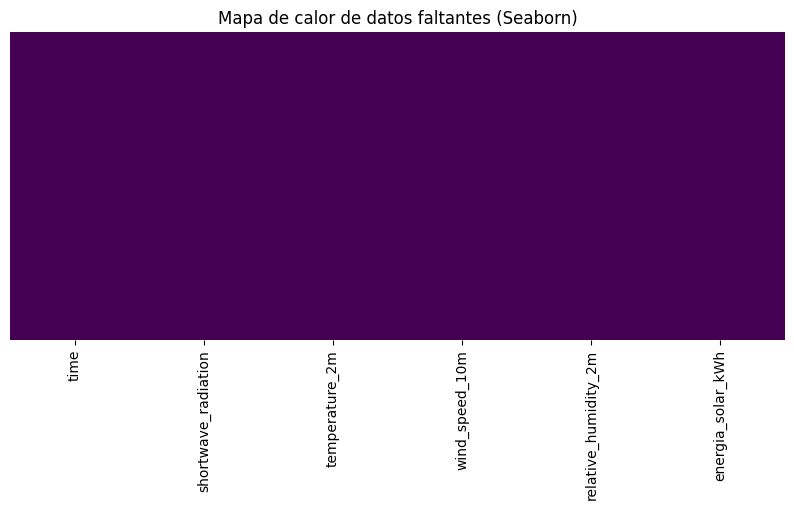

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor con True = faltante
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Mapa de calor de datos faltantes (Seaborn)")
plt.show()


/tmp/ipython-input-7-3039041952.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


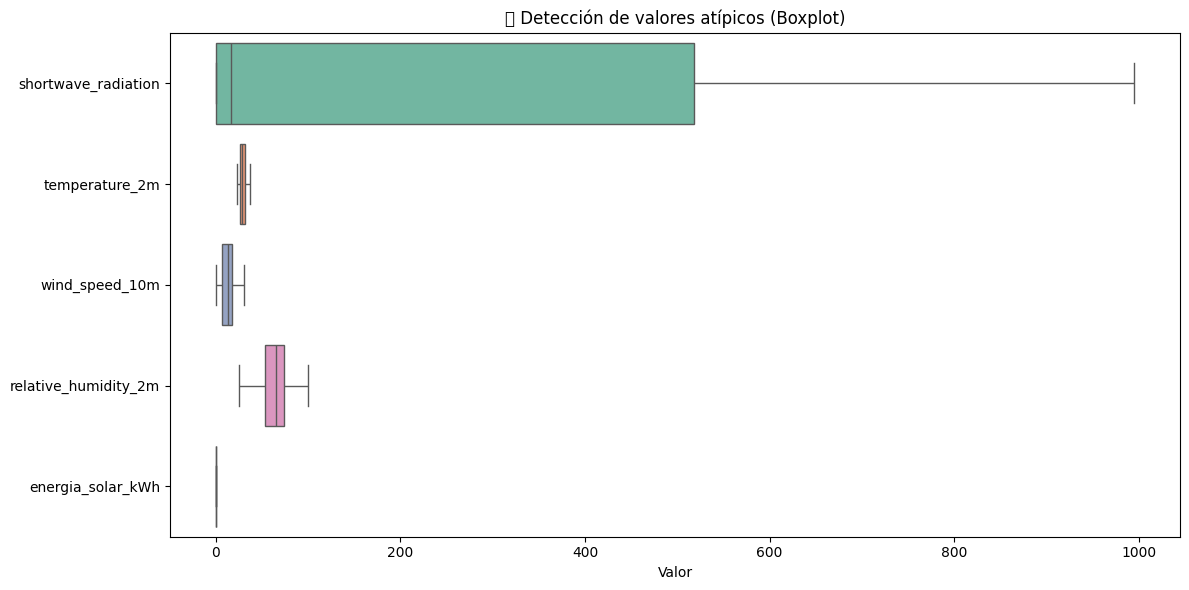

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar columnas no numéricas si es necesario
df_numericas = df.drop(columns=["time"])

# Crear los boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numericas, orient="h", palette="Set2")
plt.title("📦 Detección de valores atípicos (Boxplot)")
plt.xlabel("Valor")
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-1719855835.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


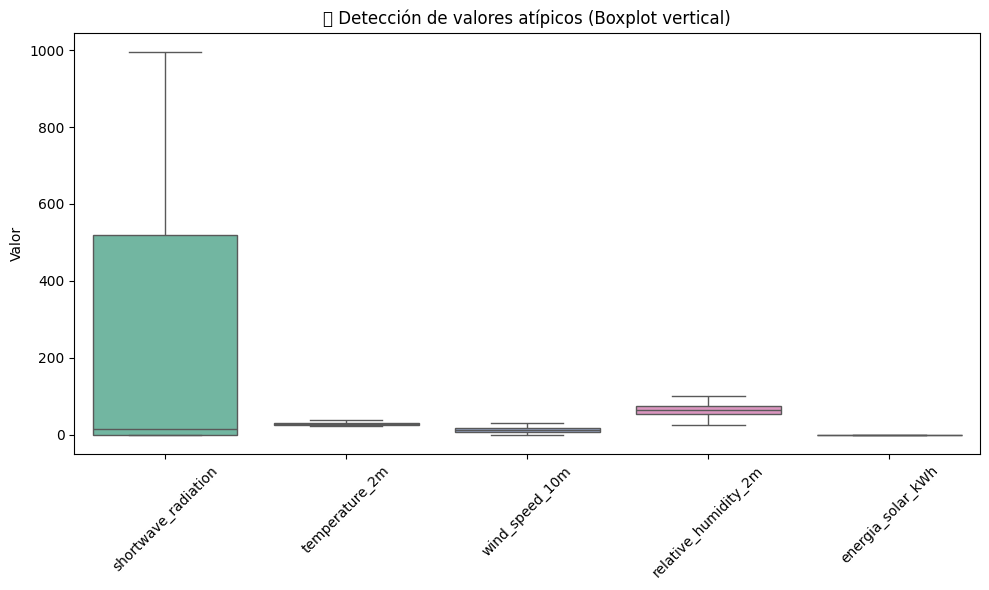

In [ ]:
# Crear boxplots verticales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numericas, orient="v", palette="Set2")
plt.title("📦 Detección de valores atípicos (Boxplot vertical)")
plt.ylabel("Valor")
plt.xticks(rotation=45)  # Rotar nombres de variables si es necesario
plt.tight_layout()
plt.show()

In [ ]:
pip install missingno


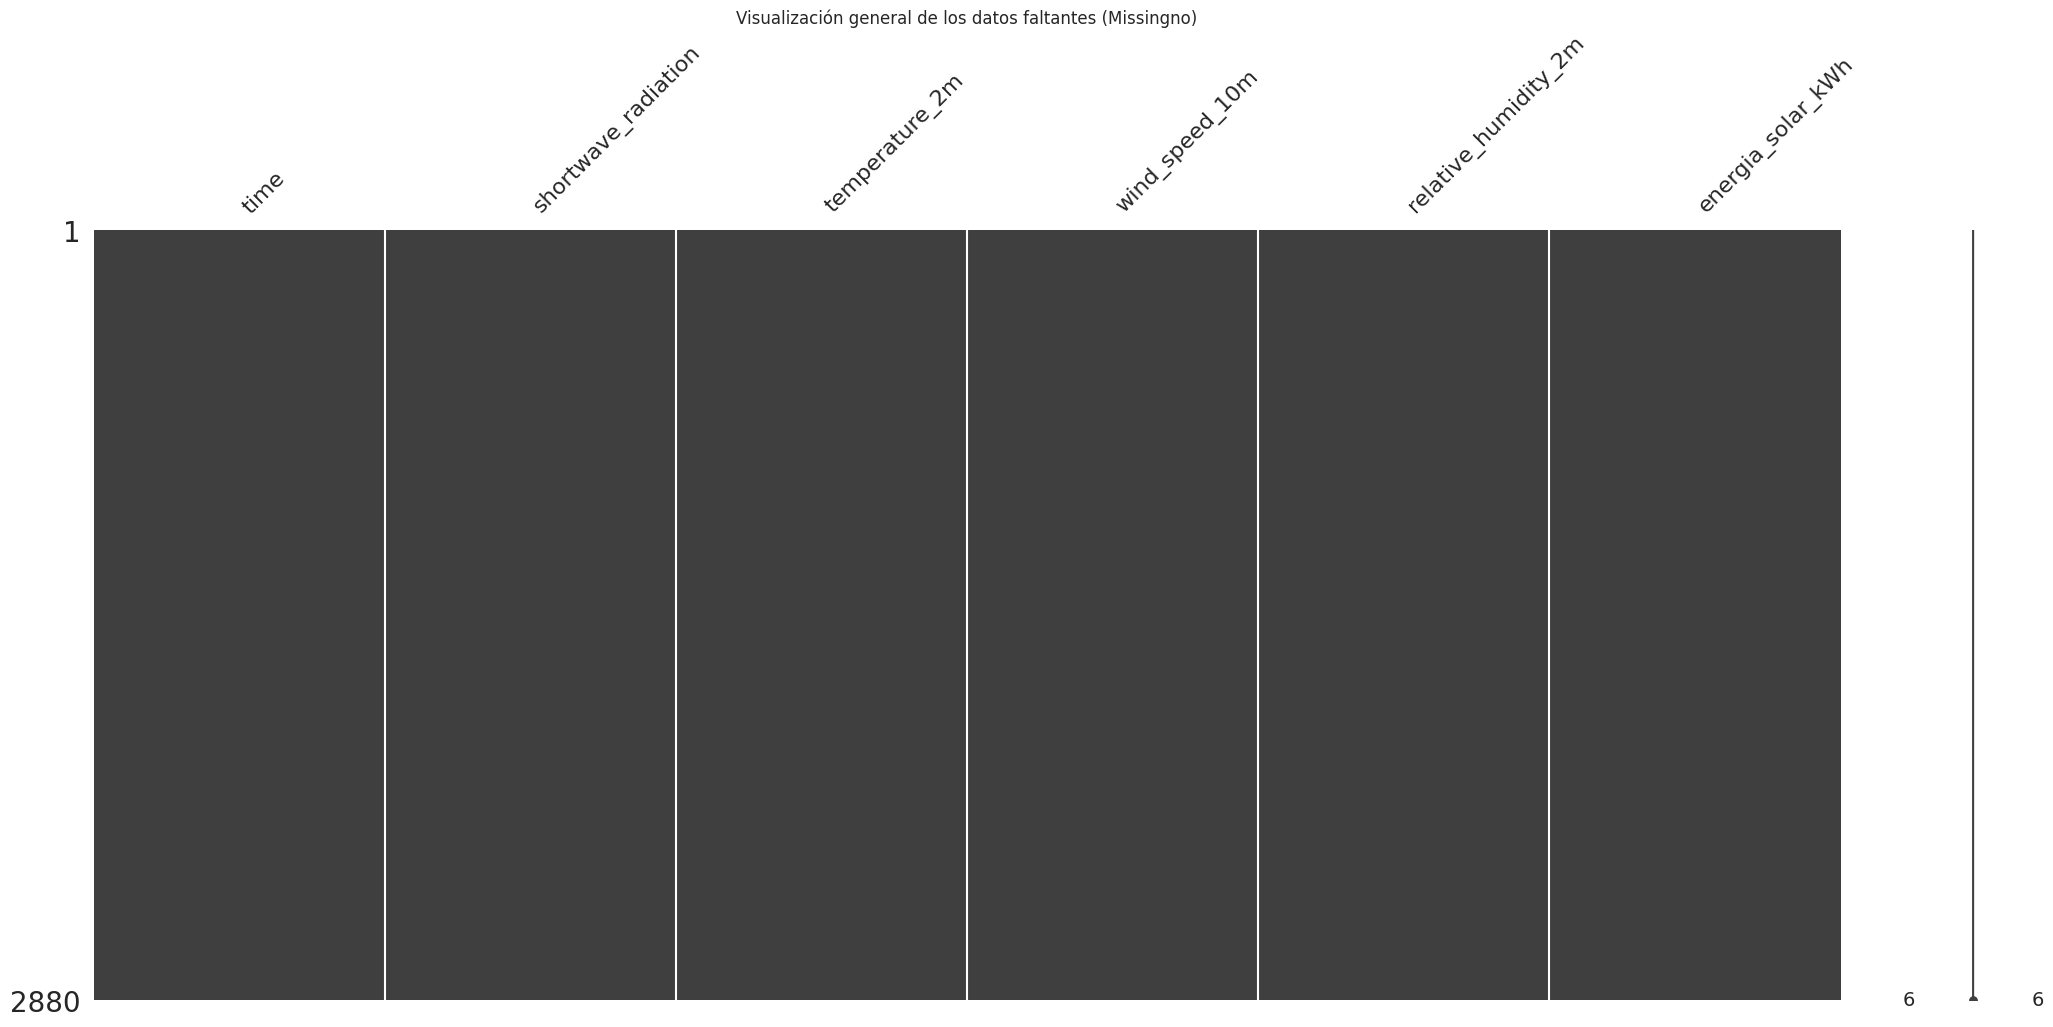

In [ ]:
import missingno as msno

msno.matrix(df)
plt.title("Visualización general de los datos faltantes (Missingno)")
plt.show()


In [ ]:
# Diccionario de nombres en inglés a español
nombres_espanol = {
    "time": "tiempo",
    "shortwave_radiation": "radiacion_solar",
    "temperature_2m": "temperatura_2m",
    "wind_speed_10m": "velocidad_viento_10m",
    "relative_humidity_2m": "humedad_relativa_2m",
    "energia_solar_kWh": "energia_solar_kWh"
}

# Renombrar columnas
df.rename(columns=nombres_espanol, inplace=True)

# Verificar nombres actualizados
print("✅ Nuevos nombres de columnas:")
print(df.columns)

✅ Nuevos nombres de columnas:
Index(['tiempo', 'radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m',
       'humedad_relativa_2m', 'energia_solar_kWh'],
      dtype='object')


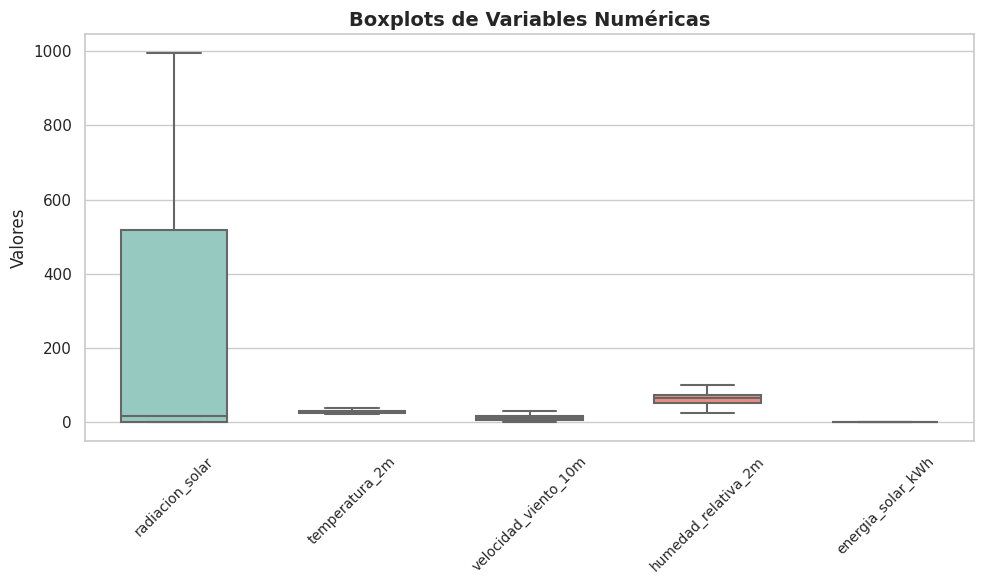

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo gráfico
sns.set(style="whitegrid", palette="pastel")

# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear figura y ejes
plt.figure(figsize=(10, 6))

# Boxplots verticales
sns.boxplot(data=df[numeric_cols], orient='v', palette='Set3', width=0.6, linewidth=1.5, fliersize=3)

# Títulos y etiquetas
plt.title('Boxplots de Variables Numéricas', fontsize=14, fontweight='bold')
plt.ylabel('Valores', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()


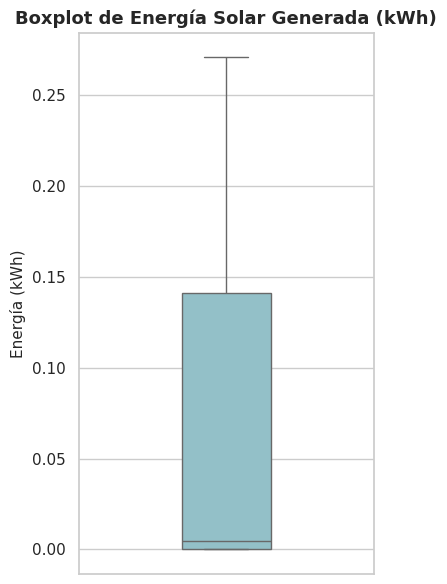

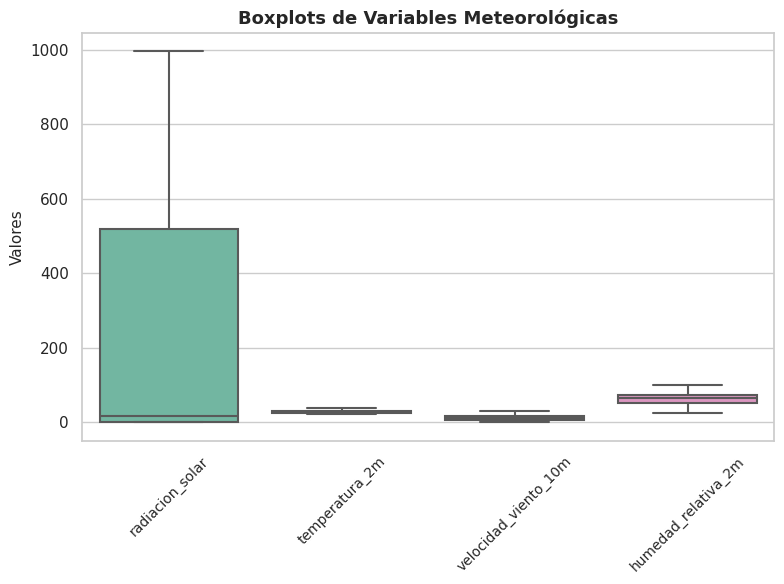

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo gráfico
sns.set(style="whitegrid", palette="pastel")

# --- 1. Boxplot exclusivo para 'energia_solar_kWh' ---
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['energia_solar_kWh'], color="#8AC6D1", width=0.3)
plt.title('Boxplot de Energía Solar Generada (kWh)', fontsize=13, fontweight='bold')
plt.ylabel('Energía (kWh)', fontsize=11)
plt.tight_layout()
plt.show()

# --- 2. Boxplots para el resto de las variables numéricas ---
variables_otros = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[variables_otros], orient='v', palette='Set2', linewidth=1.5)
plt.title('Boxplots de Variables Meteorológicas', fontsize=13, fontweight='bold')
plt.ylabel('Valores', fontsize=11)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())


['tiempo', 'radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']


In [ ]:
import numpy as np

# Seleccionar solo las columnas numéricas
num_cols = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']
num_df = df[num_cols]

# --- MÉTODO IQR ---
print("📌 Outliers por IQR:")
for col in num_cols:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = num_df[(num_df[col] < lower) | (num_df[col] > upper)]
    print(f"{col}: {len(outliers)} valores atípicos")

# --- MÉTODO Z-SCORE ---
print("\n📌 Outliers por Z-score (|z| > 3):")
z_scores = (num_df - num_df.mean()) / num_df.std()
for col in num_cols:
    outliers = num_df[np.abs(z_scores[col]) > 3]
    print(f"{col}: {len(outliers)} valores atípicos")

📌 Outliers por IQR:
radiacion_solar: 0 valores atípicos
temperatura_2m: 0 valores atípicos
velocidad_viento_10m: 0 valores atípicos
humedad_relativa_2m: 0 valores atípicos
energia_solar_kWh: 0 valores atípicos

📌 Outliers por Z-score (|z| > 3):
radiacion_solar: 0 valores atípicos
temperatura_2m: 0 valores atípicos
velocidad_viento_10m: 0 valores atípicos
humedad_relativa_2m: 0 valores atípicos
energia_solar_kWh: 0 valores atípicos


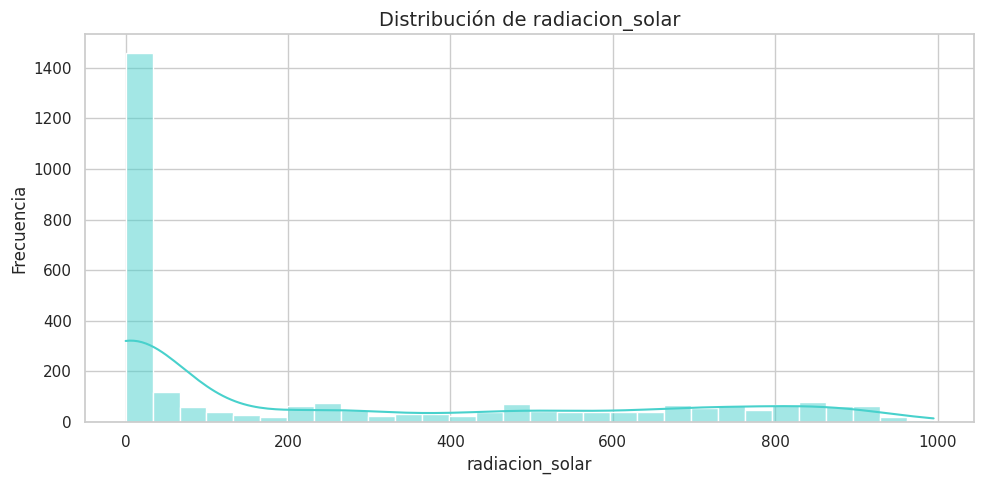

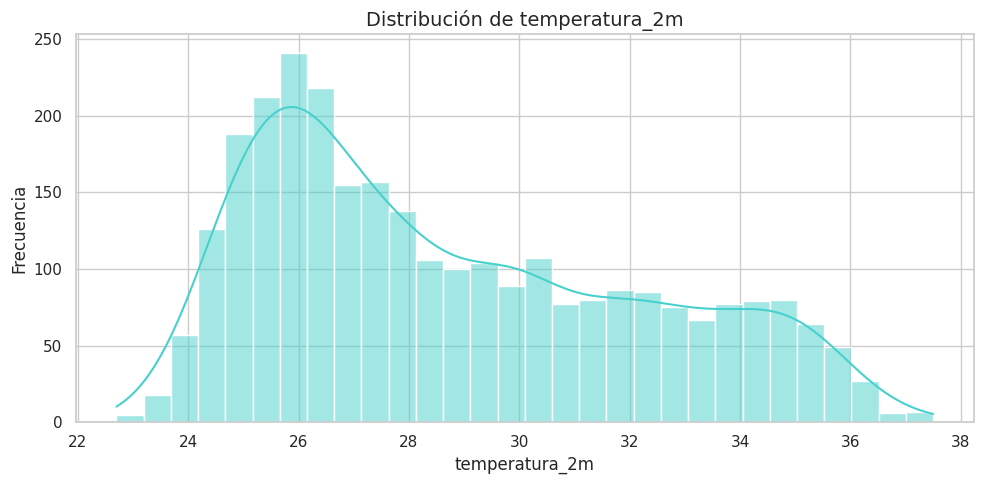

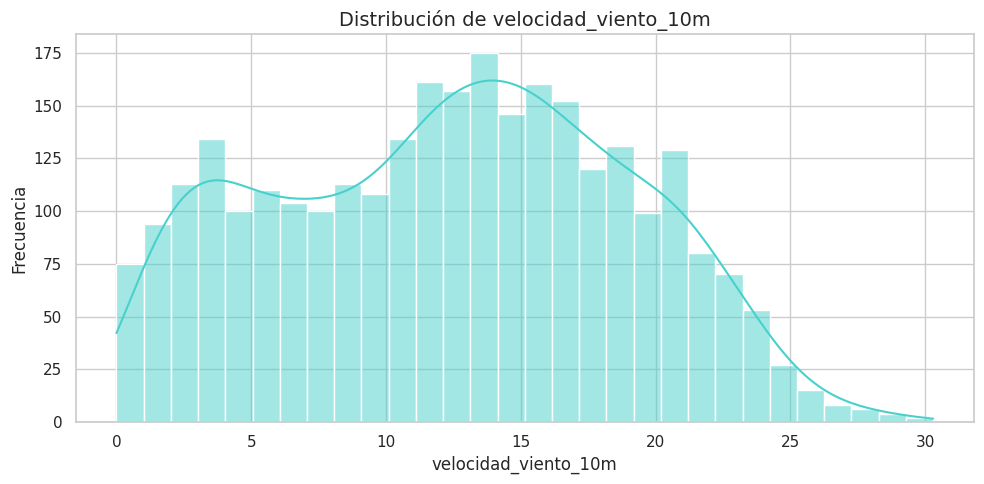

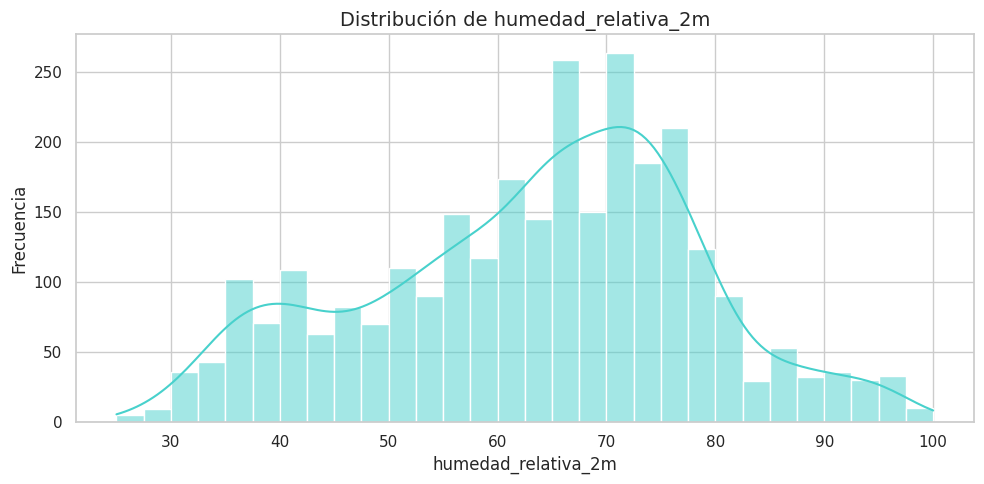

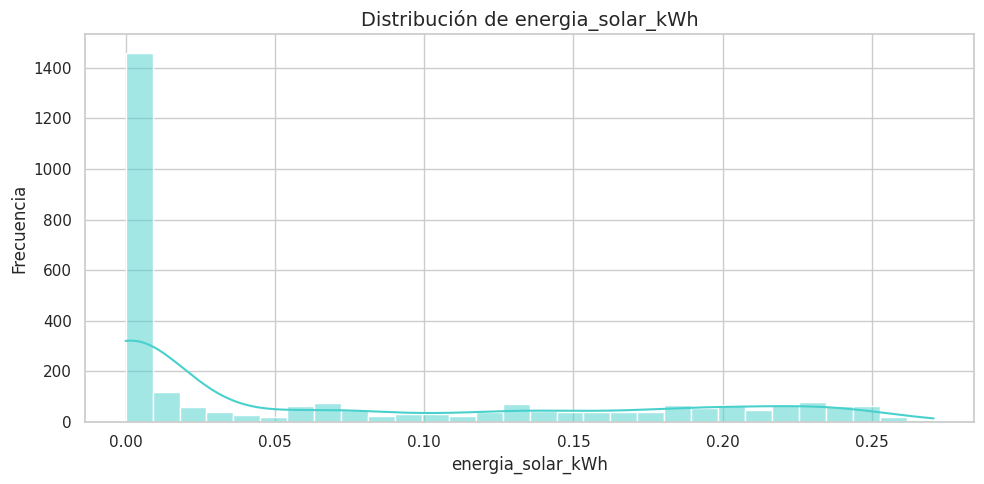

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Graficar histogramas con curvas de densidad
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, kde=True, color='mediumturquoise')
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.tight_layout()
    plt.show()


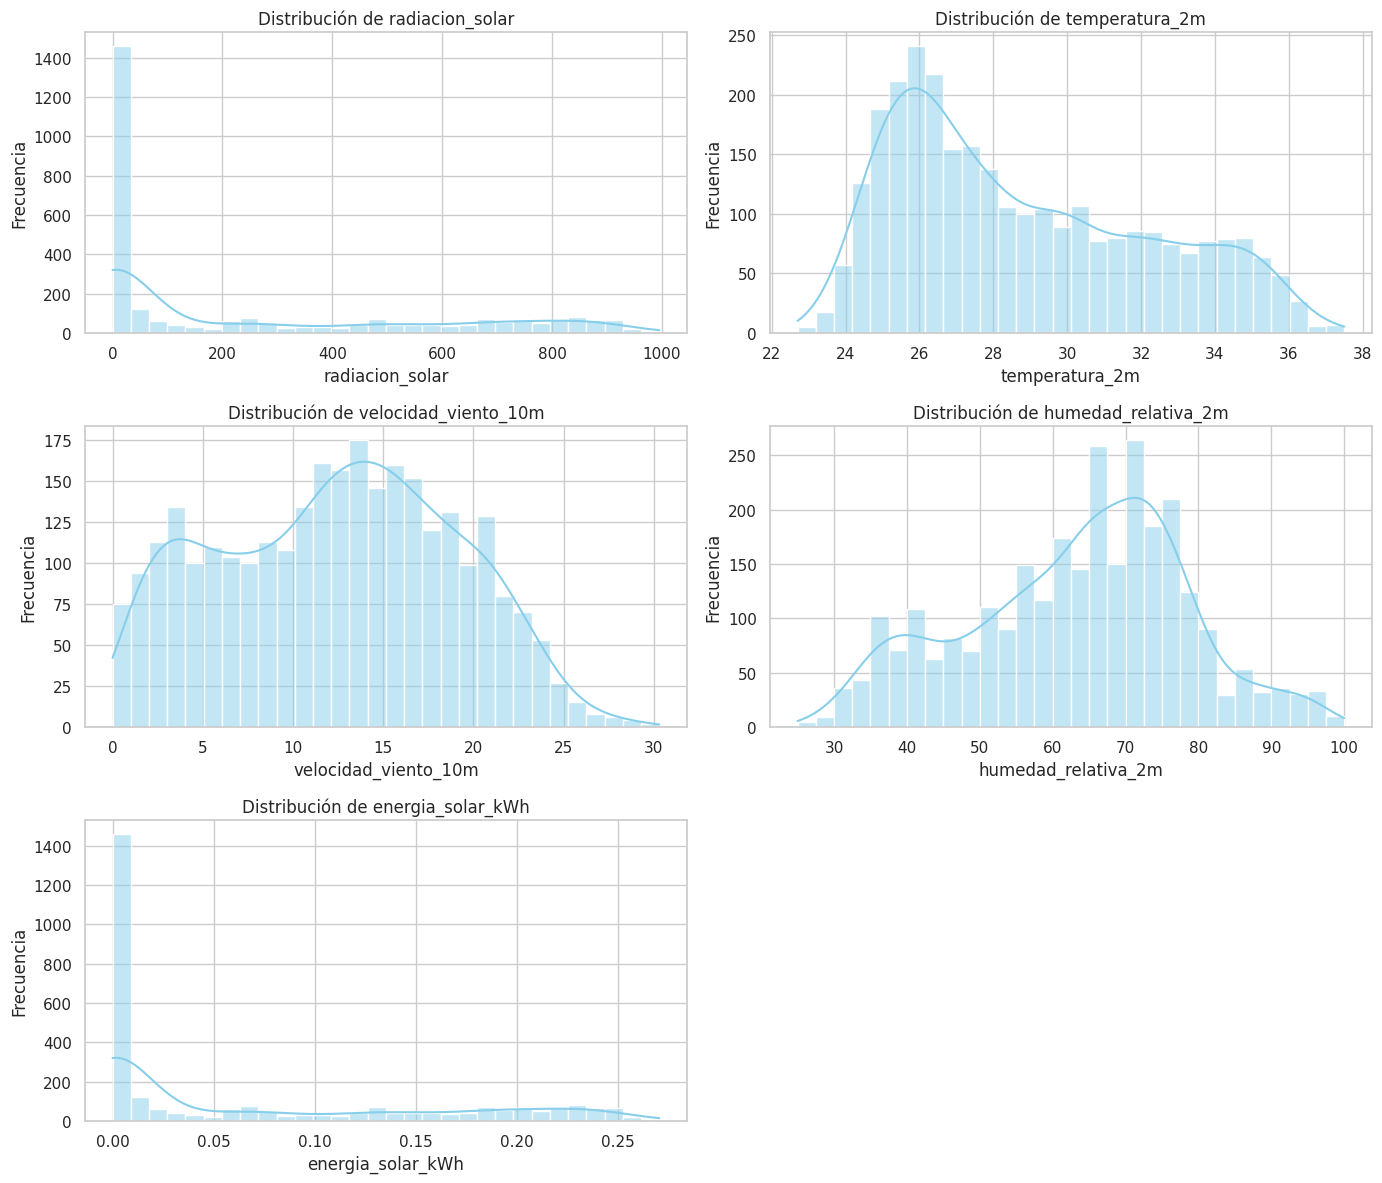

In [ ]:
# Estilo gráfico
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Graficar cada variable
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar el subplot vacío si hay número impar de variables
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
print("📌 Resultados de la prueba de Shapiro-Wilk:\n")
for col in num_cols:
    stat, p = shapiro(df[col].sample(n=500, random_state=42))  # Se toma una muestra si hay muchos datos
    print(f"{col}: estadístico = {stat:.4f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("  → No sigue una distribución normal (se rechaza H0)\n")
    else:
        print("  → Puede considerarse normal (no se rechaza H0)\n")

📌 Resultados de la prueba de Shapiro-Wilk:

radiacion_solar: estadístico = 0.7406, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

temperatura_2m: estadístico = 0.9257, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

velocidad_viento_10m: estadístico = 0.9804, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

humedad_relativa_2m: estadístico = 0.9784, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)

energia_solar_kWh: estadístico = 0.7406, p-valor = 0.0000
  → No sigue una distribución normal (se rechaza H0)



In [ ]:

from scipy.stats import skew, kurtosis

# Cálculo de asimetría y curtosis
print("📌 Asimetría y Curtosis de las variables:\n")
for col in num_cols:
    col_skew = skew(df[col].dropna())
    col_kurt = kurtosis(df[col].dropna(), fisher=True)  # Fisher=True devuelve curtosis normalizada (0 = normal)
    print(f"{col}:")
    print(f"  → Asimetría: {col_skew:.4f}")
    print(f"  → Curtosis: {col_kurt:.4f}\n")

📌 Asimetría y Curtosis de las variables:

radiacion_solar:
  → Asimetría: 0.8827
  → Curtosis: -0.8206

temperatura_2m:
  → Asimetría: 0.5514
  → Curtosis: -0.8437

velocidad_viento_10m:
  → Asimetría: -0.0122
  → Curtosis: -0.8948

humedad_relativa_2m:
  → Asimetría: -0.2377
  → Curtosis: -0.4759

energia_solar_kWh:
  → Asimetría: 0.8827
  → Curtosis: -0.8206



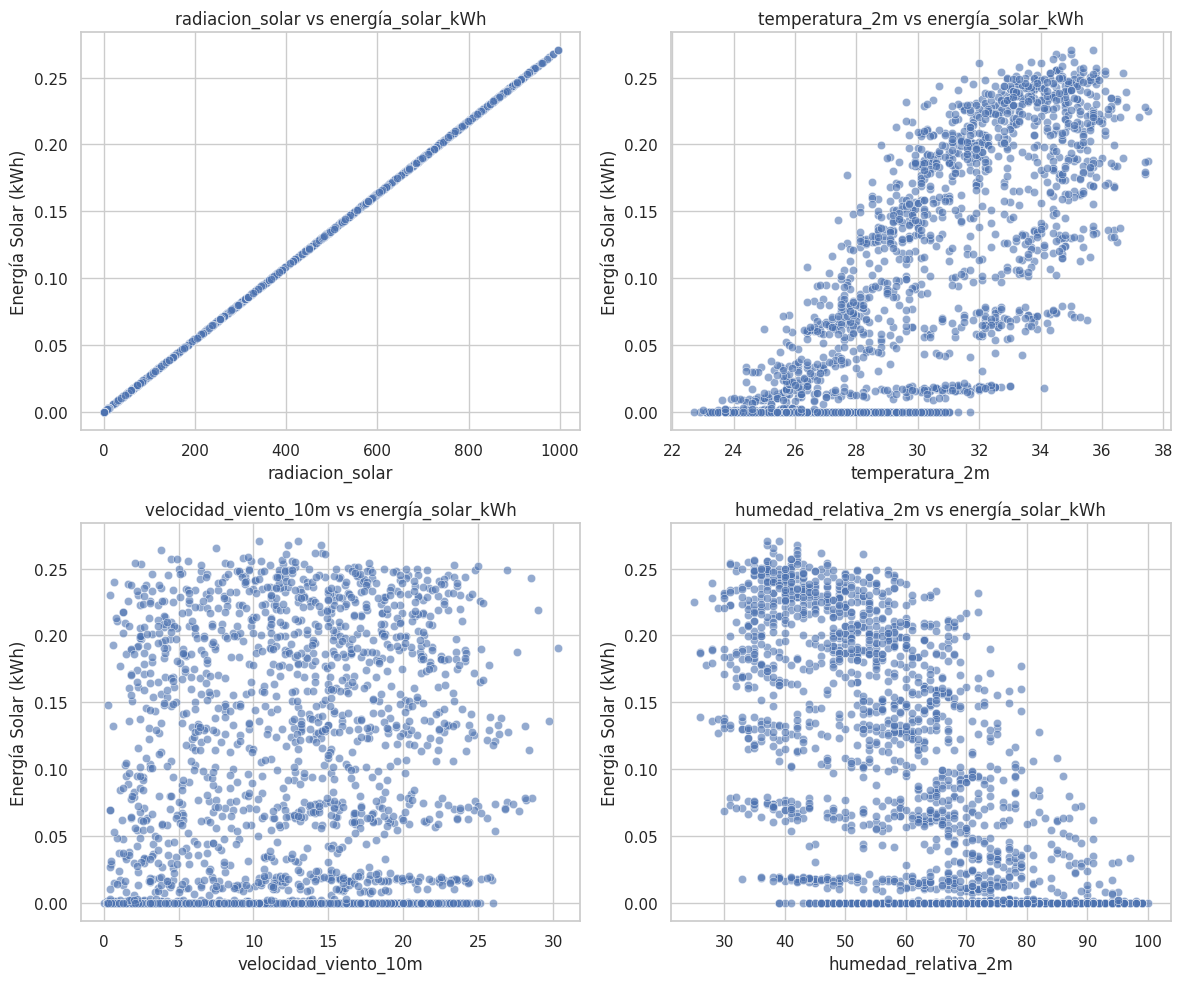

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Lista de predictores
predictors = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']

# Crear gráficos de dispersión
plt.figure(figsize=(12, 10))
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y='energia_solar_kWh', alpha=0.6)
    plt.title(f'{col} vs energía_solar_kWh')
    plt.xlabel(col)
    plt.ylabel('Energía Solar (kWh)')

plt.tight_layout()
plt.show()

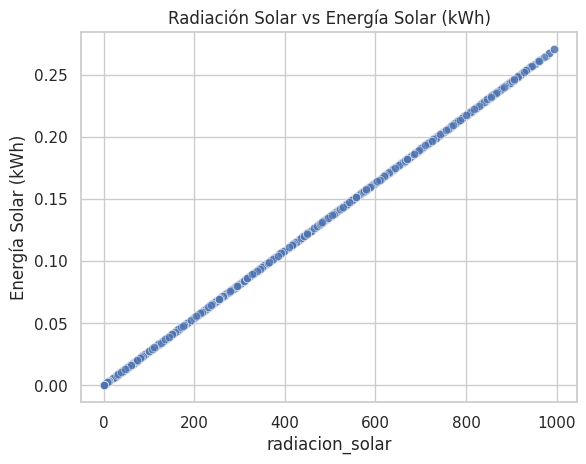

In [ ]:
sns.scatterplot(data=df, x='radiacion_solar', y='energia_solar_kWh', alpha=0.6)
plt.title('Radiación Solar vs Energía Solar (kWh)')
plt.xlabel('radiacion_solar')
plt.ylabel('Energía Solar (kWh)')
plt.show()


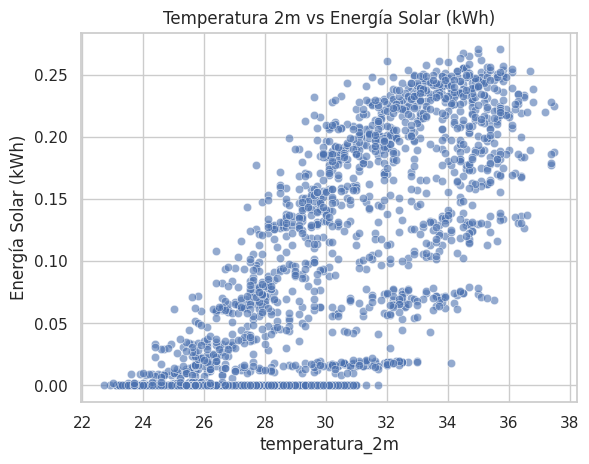

In [ ]:
sns.scatterplot(data=df, x='temperatura_2m', y='energia_solar_kWh', alpha=0.6)
plt.title('Temperatura 2m vs Energía Solar (kWh)')
plt.xlabel('temperatura_2m')
plt.ylabel('Energía Solar (kWh)')
plt.show()


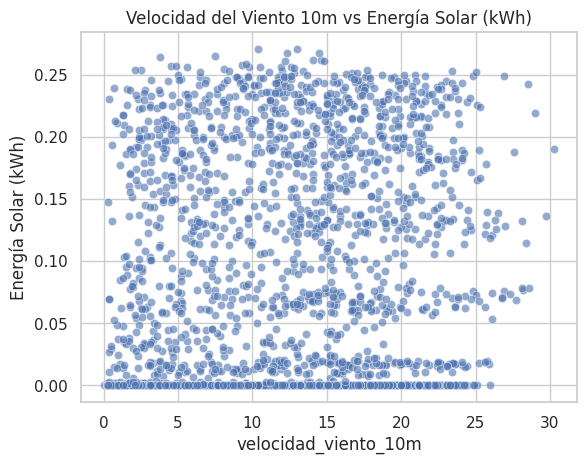

In [ ]:
sns.scatterplot(data=df, x='velocidad_viento_10m', y='energia_solar_kWh', alpha=0.6)
plt.title('Velocidad del Viento 10m vs Energía Solar (kWh)')
plt.xlabel('velocidad_viento_10m')
plt.ylabel('Energía Solar (kWh)')
plt.show()


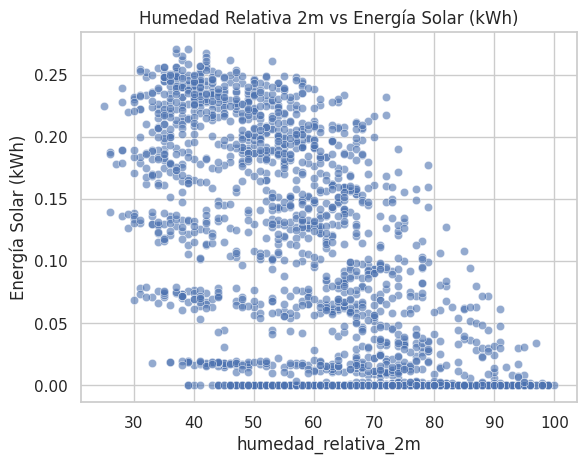

In [ ]:
sns.scatterplot(data=df, x='humedad_relativa_2m', y='energia_solar_kWh', alpha=0.6)
plt.title('Humedad Relativa 2m vs Energía Solar (kWh)')
plt.xlabel('humedad_relativa_2m')
plt.ylabel('Energía Solar (kWh)')
plt.show()


In [ ]:

import pandas as pd
from scipy.stats import spearmanr

# Variables predictoras y objetivo
predictors = ['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']
target = 'energia_solar_kWh'

# Calcular correlaciones de Spearman
results = []
for col in predictors:
    spearman_corr, _ = spearmanr(df[col], df[target])
    results.append((col, spearman_corr))

# Mostrar resultados
spearman_df = pd.DataFrame(results, columns=['Variable', 'Spearman Correlation'])
print(spearman_df)


               Variable  Spearman Correlation
0       radiacion_solar              1.000000
1        temperatura_2m              0.769696
2  velocidad_viento_10m              0.050954
3   humedad_relativa_2m             -0.626942


In [ ]:
pip install dcor

In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import dcor


# Calcular Spearman y Distance Correlation
results = []
for col in predictors:
    spearman_corr, _ = spearmanr(df[col], df[target])
    distance_corr = dcor.distance_correlation(df[col], df[target])
    results.append((col, spearman_corr, distance_corr))

# Resultados como tabla
correlation_df = pd.DataFrame(results, columns=['Variable', 'Spearman Correlation', 'Distance Correlation'])
print(correlation_df)


               Variable  Spearman Correlation  Distance Correlation
0       radiacion_solar              1.000000              1.000000
1        temperatura_2m              0.769696              0.807122
2  velocidad_viento_10m              0.050954              0.070205
3   humedad_relativa_2m             -0.626942              0.652120


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


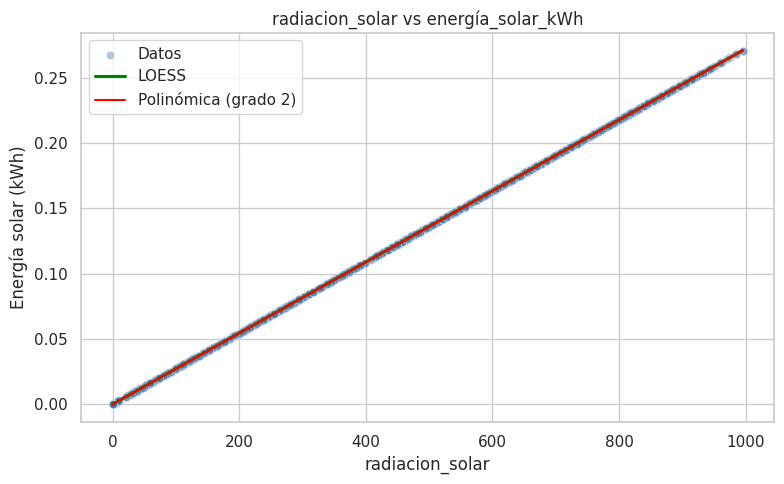

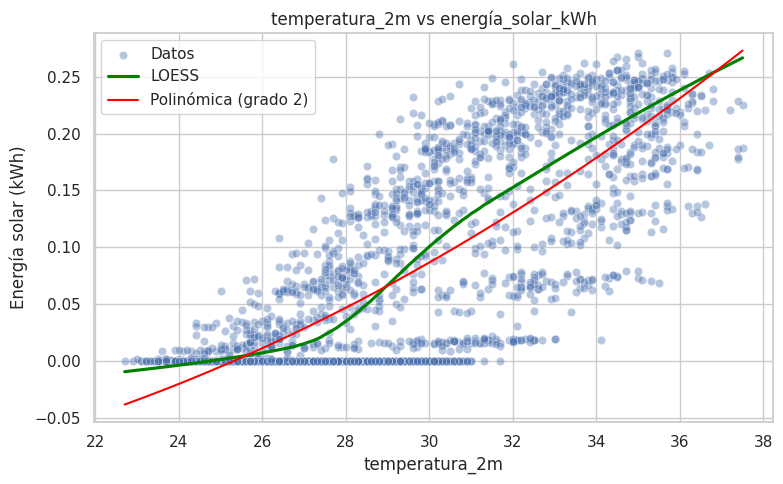

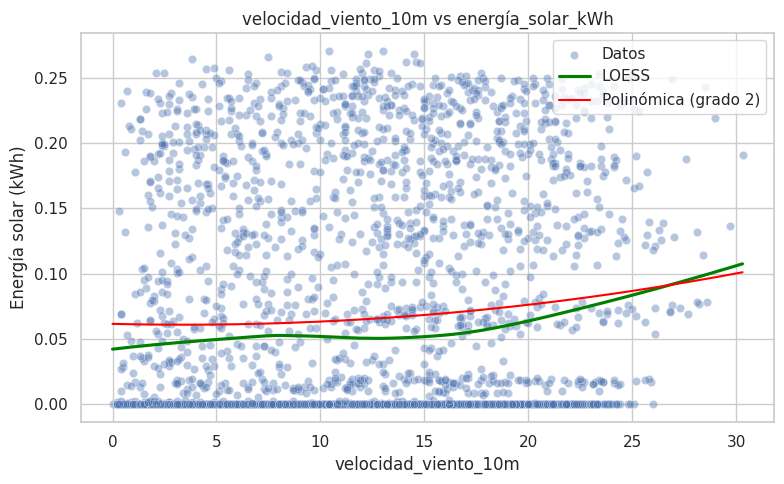

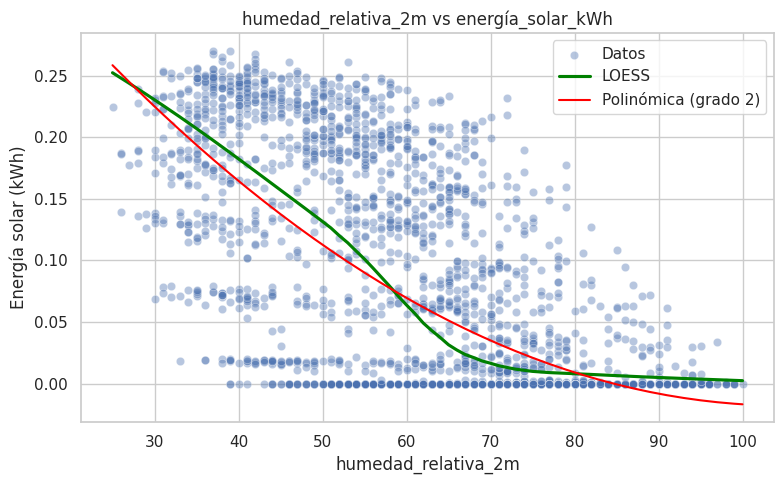

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Crear gráficos
for col in predictors:
    plt.figure(figsize=(8, 5))

    # Scatterplot básico
    sns.scatterplot(x=df[col], y=df[target], alpha=0.4, label='Datos')

    # LOESS (usando lowess de seaborn/regplot)
    sns.regplot(x=col, y=target, data=df, lowess=True, scatter=False, label='LOESS', color='green')

    # Ajuste polinómico de grado 2
    X_poly = PolynomialFeatures(degree=2).fit_transform(df[[col]])
    model = LinearRegression().fit(X_poly, df[target])
    y_pred = model.predict(X_poly)

    # Ordenar para graficar curva polinómica
    sorted_idx = np.argsort(df[col])
    plt.plot(df[col].values[sorted_idx], y_pred[sorted_idx], label='Polinómica (grado 2)', color='red')

    plt.title(f'{col} vs energía_solar_kWh')
    plt.xlabel(col)
    plt.ylabel('Energía solar (kWh)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


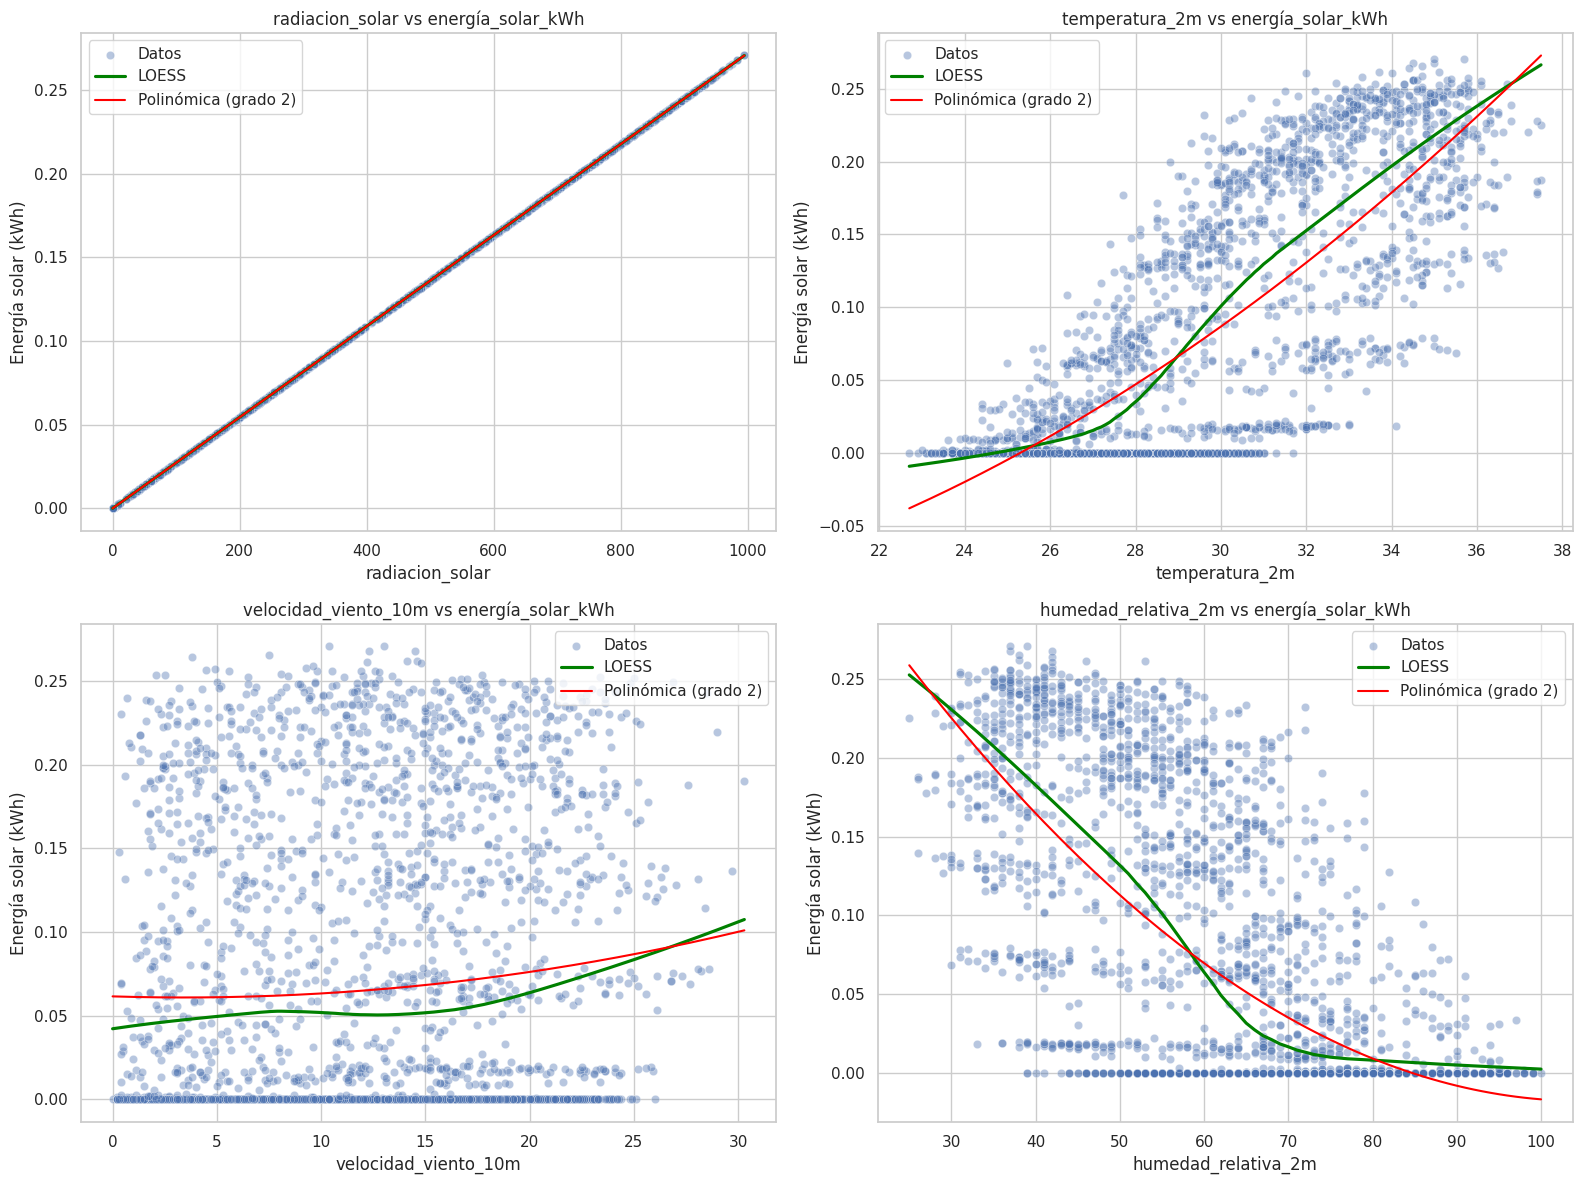

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Crear subplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)

    # Scatter
    sns.scatterplot(x=df[col], y=df[target], alpha=0.4, label='Datos')

    # LOESS con seaborn (lowess=True)
    sns.regplot(x=col, y=target, data=df, lowess=True, scatter=False, label='LOESS', color='green')

    # Ajuste polinómico grado 2
    X_poly = PolynomialFeatures(degree=2).fit_transform(df[[col]])
    model = LinearRegression().fit(X_poly, df[target])
    y_pred = model.predict(X_poly)

    # Ordenar para graficar
    sorted_idx = np.argsort(df[col])
    plt.plot(df[col].values[sorted_idx], y_pred[sorted_idx], color='red', label='Polinómica (grado 2)')

    plt.title(f'{col} vs energía_solar_kWh')
    plt.xlabel(col)
    plt.ylabel('Energía solar (kWh)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


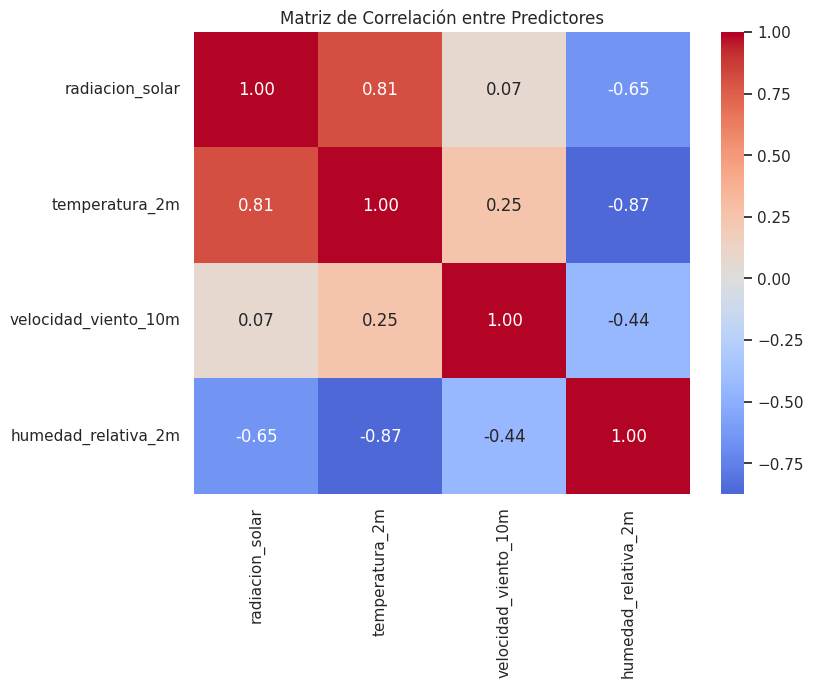

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = df[predictors].corr()

# Visualizar la matriz como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlación entre Predictores")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Solo predictores
X = df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']]

# Calcular VIF
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X.shape[1])]

# Mostrar variables con VIF > 10
print("📌 Variables con VIF mayor a 10 (posible multicolinealidad):")
print(vif_data[vif_data["VIF"] > 10])

# Identificar variables redundantes por correlación alta
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

print("\n📌 Pares de variables con correlación > 0.9 (redundancia):")
for col in upper.columns:
    for row in upper.index:
        if upper.loc[row, col] > 0.9:
            print(f"{row} y {col} → correlación = {upper.loc[row, col]:.2f}")

📌 Variables con VIF mayor a 10 (posible multicolinealidad):
Empty DataFrame
Columns: [Variable, VIF]
Index: []

📌 Pares de variables con correlación > 0.9 (redundancia):


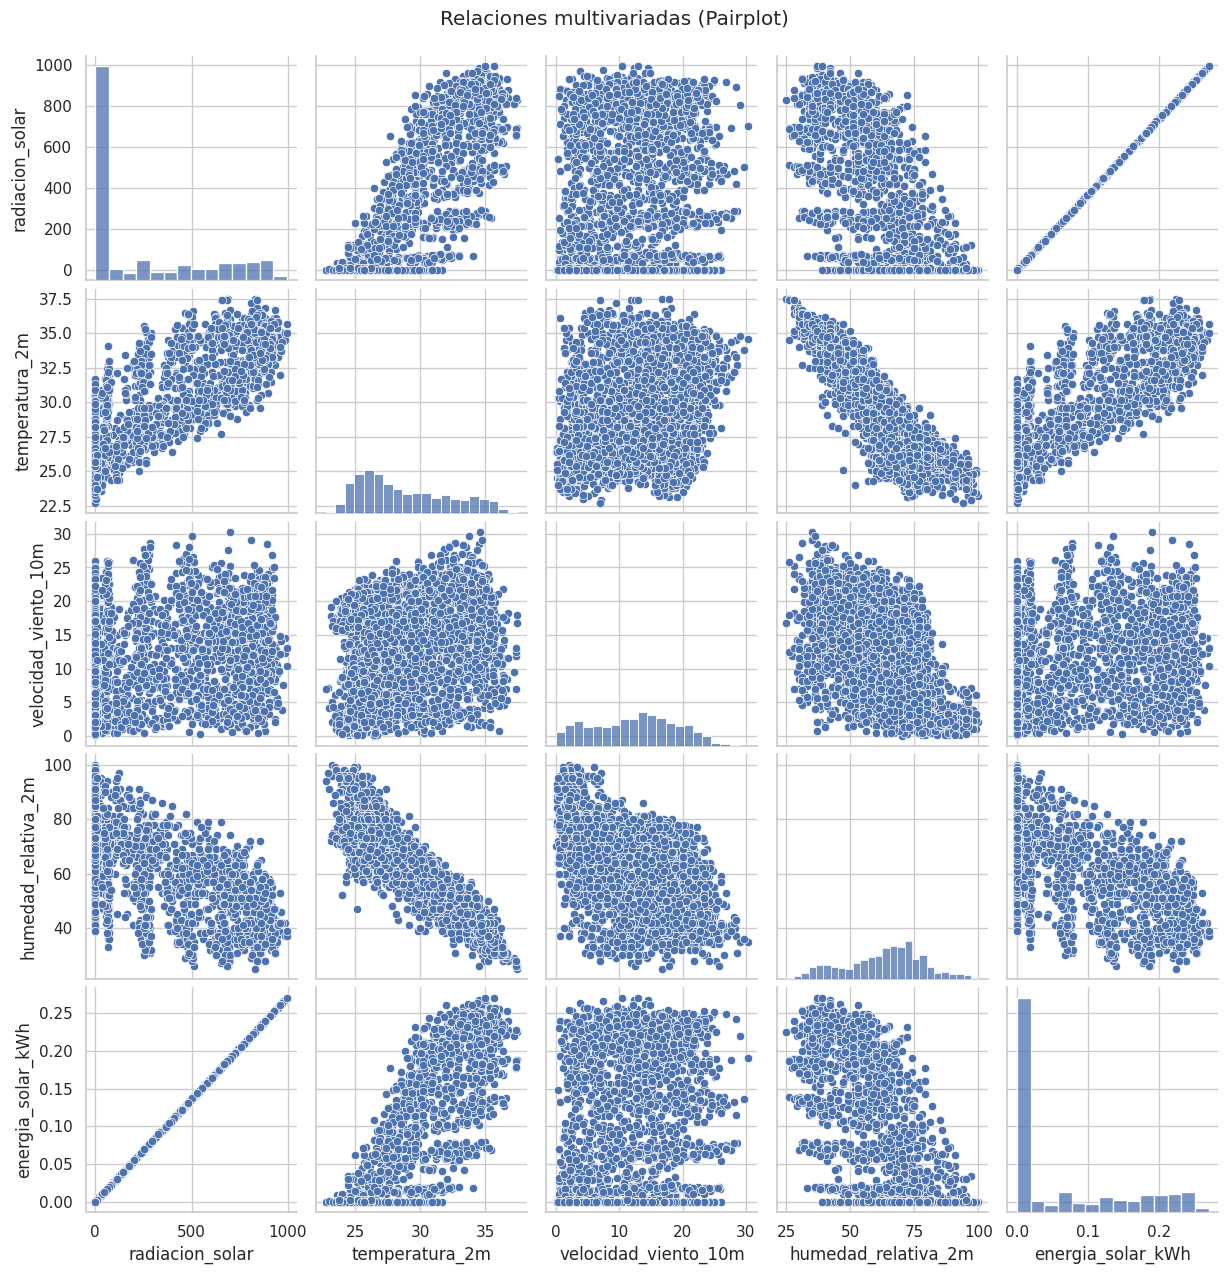

In [ ]:
sns.pairplot(df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m', 'energia_solar_kWh']])
plt.suptitle("Relaciones multivariadas (Pairplot)", y=1.02)
plt.show()


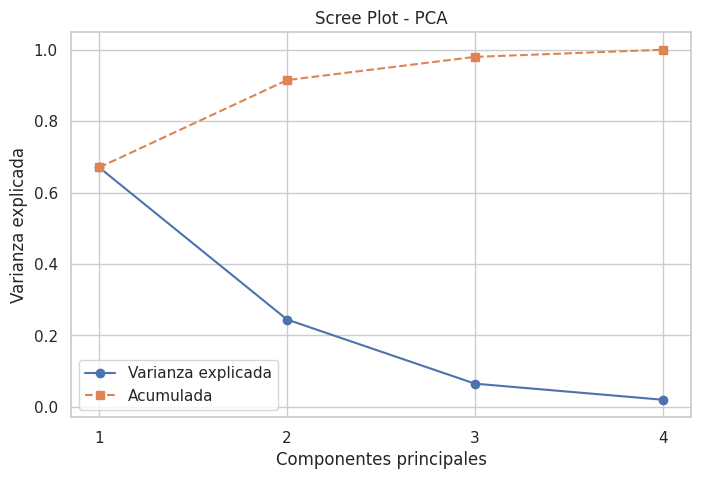

📌 Cargas factoriales (PCA):
                         PC1     PC2     PC3     PC4
radiacion_solar       0.5151 -0.3926  0.7122 -0.2708
temperatura_2m        0.5840 -0.1629 -0.2218  0.7637
velocidad_viento_10m  0.2589  0.8981  0.3432  0.0932
humedad_relativa_2m  -0.5715 -0.1135  0.5707  0.5786


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Seleccionar solo las variables predictoras
X = df[['radiacion_solar', 'temperatura_2m', 'velocidad_viento_10m', 'humedad_relativa_2m']]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Varianza explicada')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='s', linestyle='--', label='Acumulada')
plt.title('Scree Plot - PCA')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada')
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

# Mostrar cargas factoriales
cargas = pd.DataFrame(pca.components_.T,
                      columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                      index=X.columns)
print("📌 Cargas factoriales (PCA):")
print(cargas.round(4))




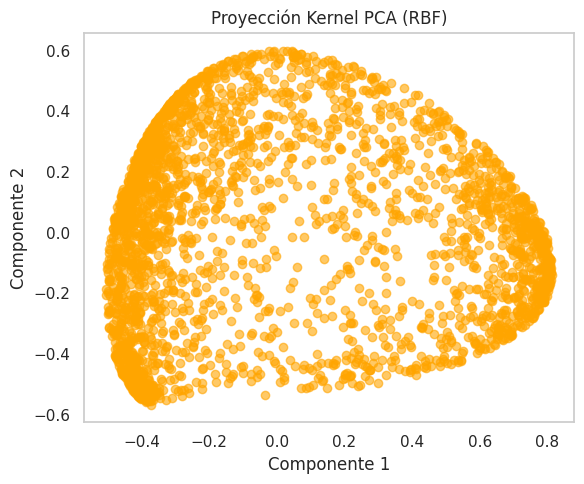

In [ ]:
from sklearn.decomposition import KernelPCA

# Kernel PCA con RBF (no lineal)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(6, 5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='orange', alpha=0.6)
plt.title('Proyección Kernel PCA (RBF)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()


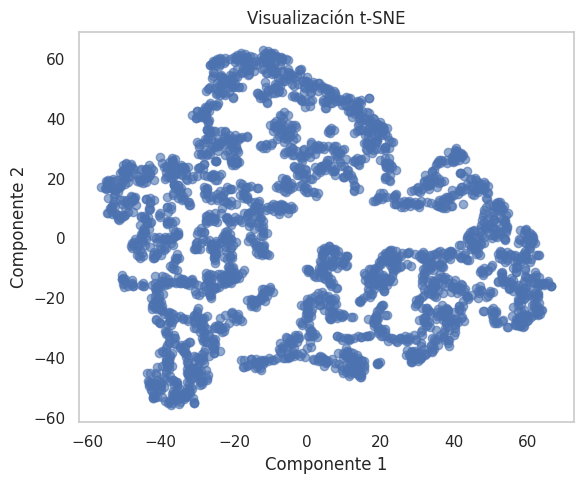

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title('Visualización t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


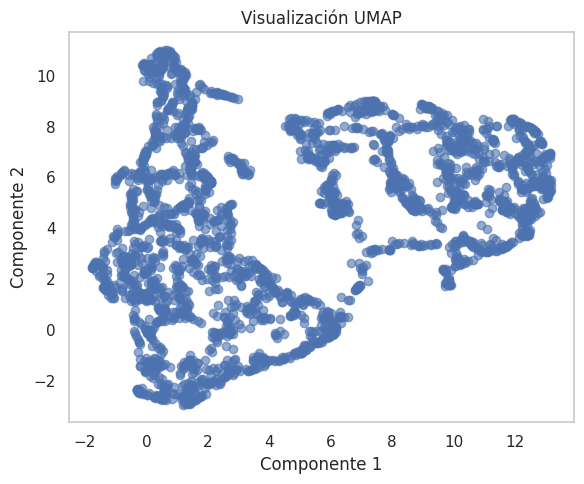

In [ ]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.title('Visualización UMAP')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.tight_layout()
plt.show()


# Desarrollo del modelo ML: XGBoost

### Cargar los datos

Se carga el archivo de datos y se hace una revisión preliminar para asegurar que los datos están completos y estructurados correctamente. Este es un paso básico pero esencial antes de cualquier modelado.

Separamos por `;` las columnas.

In [ ]:
# Importar librerías necesarias
import pandas as pd

# Cargar el archivo CSV
ruta = "base_datos_solar_lapaz_2025 (1).csv"
df = pd.read_csv(ruta, sep=';')

# Mostrar las primeras filas para verificar la estructura
print(df.head())

# Verificar si hay valores faltantes
print(df.isnull().sum())


               time  shortwave_radiation  temperature_2m  wind_speed_10m  \
0  2025-02-01T00:00                  0.0            25.5            23.1   
1  2025-02-01T01:00                  0.0            25.0            21.8   
2  2025-02-01T02:00                  0.0            24.6            20.3   
3  2025-02-01T03:00                  0.0            24.3            19.7   
4  2025-02-01T04:00                  0.0            23.9            18.9   

   relative_humidity_2m  energia_solar_kWh  
0                    68                0.0  
1                    69                0.0  
2                    70                0.0  
3                    72                0.0  
4                    74                0.0  
time                    0
shortwave_radiation     0
temperature_2m          0
wind_speed_10m          0
relative_humidity_2m    0
energia_solar_kWh       0
dtype: int64


### División de variables predictoras y objetivo

Aquí se separan las variables predictoras (X) de la variable objetivo (y), que en este caso es la energía solar estimada en kWh.

In [ ]:
# Eliminar la columna de fecha porque no la usaremos directamente
df = df.drop(columns=["time"])

# Variable objetivo
y = df["energia_solar_kWh"]

# Variables predictoras
X = df.drop(columns=["energia_solar_kWh"])

# Verificamos la forma de X y y
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")


Dimensiones de X: (2880, 4)
Dimensiones de y: (2880,)


### División de los datos en entrenamiento y prueba

Separamos los datos para que el modelo entrene con una parte (80%) y se evalúe con datos nuevos (20%). Esto permite validar su capacidad predictiva en condiciones reales.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")


Entrenamiento: (2304, 4), (2304,)
Prueba: (576, 4), (576,)


### Búsqueda de hiperparámetros (GridSearchCV)

Este paso busca los hiperparámetros ideales que hacen que el modelo XGBoost tenga mejor rendimiento. Usamos validación cruzada para evitar sobreajuste y asegurar robustez.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

# Buscar la mejor combinación con validación cruzada de 3 particiones
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # Para regresión
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

### Entrenar el modelo final con los mejores hiperparámetros

Se toma el mejor modelo que encontró GridSearchCV y se entrena completamente con los datos de entrenamiento. Ya está listo para hacer predicciones.

In [ ]:
# Extraer el mejor modelo
best_model = grid_search.best_estimator_

# Entrenar el modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

### Evaluación del modelo

Estas métricas nos dicen qué tan bien predice el modelo. Un RMSE bajo y un R² cercano a 1 indican un buen rendimiento.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Calcular RMSE manualmente si sklearn no soporta 'squared=False'
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


###  Importancia de las variables

Esta gráfica muestra qué variables aportan más a las predicciones del modelo. En este proyecto se espera que la radiación solar tenga la mayor influencia, seguida por temperatura y humedad.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancias
importances = best_model.feature_importances_
features = X.columns

# Visualizar
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Importancia de las variables en XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


# Desarrollo del modelo ML: XGBoost (Sin incluir la radiacion solar como variable predictora)

### Eliminar la variable time y la variable radiacion solar

In [ ]:
# Eliminar columnas no necesarias
df = df.drop(columns=["time", "shortwave_radiation"])

# Verificamos las columnas restantes
print("Variables disponibles:", df.columns.tolist())

Variables disponibles: ['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m', 'energia_solar_kWh']


### Separar variables predictoras y objetivo

In [ ]:
# Variable objetivo
y = df["energia_solar_kWh"]

# Variables predictoras (sin radiación)
X = df.drop(columns=["energia_solar_kWh"])


### Dividir en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Definir y entrenar el modelo

#### Definir espacio de búsqueda

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definir el modelo base
modelo_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir el grid de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

#### Ejecutar GridSearchCV

In [ ]:
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Entrenar la búsqueda
grid_search.fit(X_train, y_train)

print("✅ Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Mejores hiperparámetros encontrados:
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


#### Entrenar el modelo con los mejores parámetros

In [ ]:
# Usar el mejor modelo hallado
mejor_modelo = grid_search.best_estimator_

# Entrenarlo completamente
mejor_modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Evaluar el modelo ajustado

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = mejor_modelo.predict(X_test)

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE optimizado: {rmse:.4f}")
print(f"R² optimizado: {r2:.4f}")

RMSE optimizado: 0.0454
R² optimizado: 0.7114


### Importancia de cada Variable

/tmp/ipython-input-30-2207769947.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-30-2207769947.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


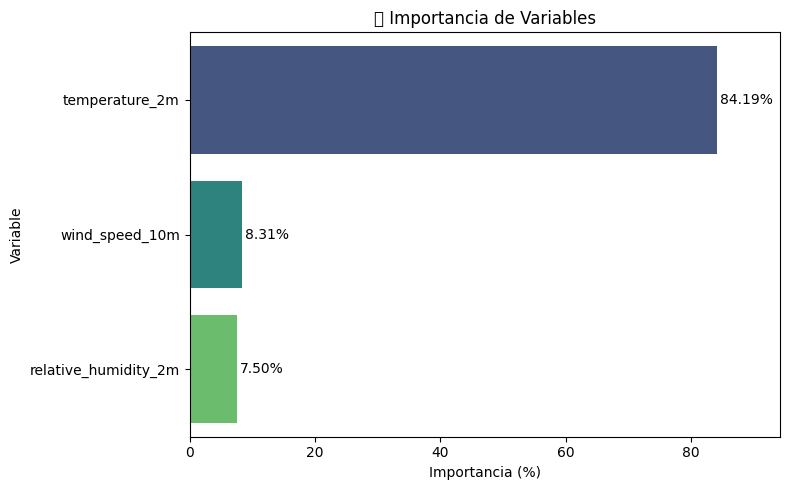

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener importancias
importancias = mejor_modelo.feature_importances_
nombres_variables = X.columns

# Calcular porcentajes
porcentajes = 100 * (importancias / importancias.sum())

# Crear DataFrame ordenado
df_importancia = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia (%)': porcentajes
}).sort_values(by='Importancia (%)', ascending=False)

# Gráfica
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=df_importancia,
    x='Importancia (%)',
    y='Variable',
    palette='viridis'
)

# Añadir etiquetas con los porcentajes encima de las barras
for i, (valor, nombre) in enumerate(zip(df_importancia['Importancia (%)'], df_importancia['Variable'])):
    plt.text(valor + 0.5, i, f"{valor:.2f}%", va='center')

plt.title("📊 Importancia de Variables")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.xlim(0, max(df_importancia['Importancia (%)']) + 10)
plt.tight_layout()
plt.show()

# Desarrollo del modelo Random Forest Regressor (Sin incluir la radiacion solar como variable predictora)

### Preparación de los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=["energia_solar_kWh"])
y = df["energia_solar_kWh"]

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Definir modelo base

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo base
rf_base = RandomForestRegressor(random_state=42)

###  Búsqueda de hiperparámetros con GridSearchCV

Vamos a usar hiperparámetros comunes de Random Forest:

* `n_estimators:` árboles del bosque

* `max_depth:` profundidad máxima

* `min_samples_split:` mínimo de muestras para dividir un nodo

* `min_samples_leaf:` mínimo de muestras en una hoja

* `max_features:` número de variables consideradas en cada división

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
108 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

#### Ver mejores hiperparámetros

In [ ]:
print("✅ Mejores hiperparámetros para Random Forest:")
print(grid_search_rf.best_params_)

✅ Mejores hiperparámetros para Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Entrenar el mejor modelo

In [ ]:
mejor_rf = grid_search_rf.best_estimator_
mejor_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

### Evaluar el modelo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_pred_rf = mejor_rf.predict(X_test)

# Métricas
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R²: {r2_rf:.4f}")

RMSE: 0.0461
MAE: 0.0311
R²: 0.7021


### Importancia de las variables

/tmp/ipython-input-23-3505492290.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia_rf, x='Importancia (%)', y='Variable', palette='crest')
/tmp/ipython-input-23-3505492290.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


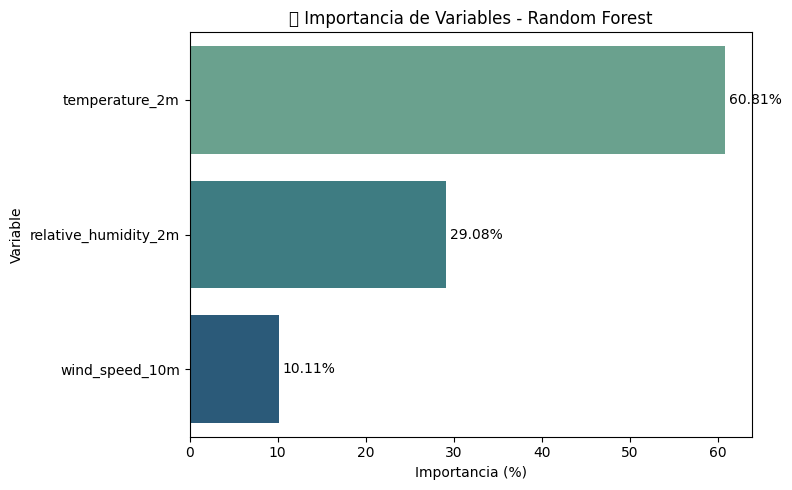

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importancias = mejor_rf.feature_importances_
nombres = X.columns
porcentajes = 100 * importancias / importancias.sum()

df_importancia_rf = pd.DataFrame({
    'Variable': nombres,
    'Importancia (%)': porcentajes
}).sort_values(by='Importancia (%)', ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_importancia_rf, x='Importancia (%)', y='Variable', palette='crest')
for i, (val, var) in enumerate(zip(df_importancia_rf['Importancia (%)'], df_importancia_rf['Variable'])):
    plt.text(val + 0.5, i, f"{val:.2f}%", va='center')
plt.title("📊 Importancia de Variables - Random Forest")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Desarrollo del modelo Gradient Boosting Regressor (Sin incluir la radiacion solar como variable predictora)

### Preparación de los datos

In [ ]:
# Separar predictoras y objetivo
X = df.drop(columns=["energia_solar_kWh"])
y = df["energia_solar_kWh"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Definir modelo base

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_base = GradientBoostingRegressor(random_state=42)

### Búsqueda de hiperparámetros

Usaremos los siguientes hiperparámetros:

| Hiperparámetro      | Qué hace                                                    |
| ------------------- | ----------------------------------------------------------- |
| `n_estimators`      | Número de árboles                                           |
| `learning_rate`     | Tasa de aprendizaje (más bajo = más lento pero más preciso) |
| `max_depth`         | Profundidad de cada árbol                                   |
| `min_samples_split` | Mínimo de muestras para dividir un nodo                     |
| `min_samples_leaf`  | Mínimo de muestras en una hoja                              |


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_gbr = GridSearchCV(
    estimator=gbr_base,
    param_grid=param_grid_gbr,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_gbr.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

#### Ver mejores hiperparámetros

In [ ]:
print("✅ Mejores hiperparámetros para Gradient Boosting:")
print(grid_search_gbr.best_params_)

✅ Mejores hiperparámetros para Gradient Boosting:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


### Entrenar modelo final

In [ ]:
mejor_gbr = grid_search_gbr.best_estimator_
mejor_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=2,
                          random_state=42)

### Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_gbr = mejor_gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE: {mae_gbr:.4f}")
print(f"R²: {r2_gbr:.4f}")

RMSE: 0.0456
MAE: 0.0306
R²: 0.7097


### Importancia de las variables

/tmp/ipython-input-30-637338041.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia_gbr, x='Importancia (%)', y='Variable', palette='magma')
/tmp/ipython-input-30-637338041.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


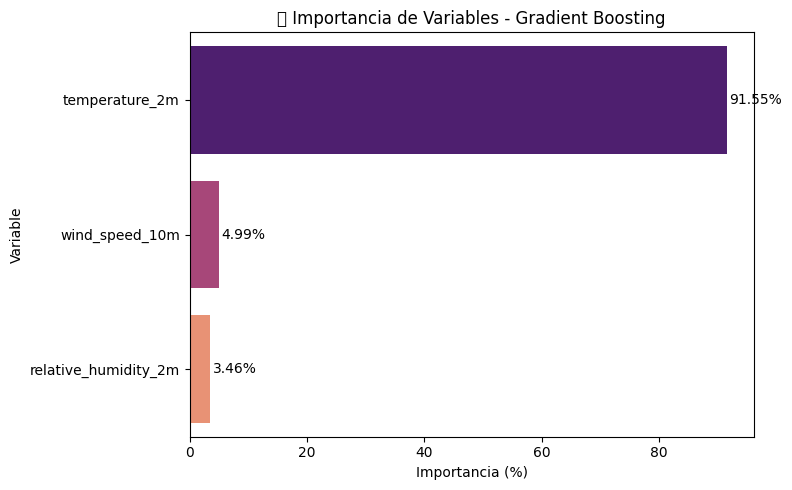

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importancias = mejor_gbr.feature_importances_
nombres = X.columns
porcentajes = 100 * importancias / importancias.sum()

df_importancia_gbr = pd.DataFrame({
    'Variable': nombres,
    'Importancia (%)': porcentajes
}).sort_values(by='Importancia (%)', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_importancia_gbr, x='Importancia (%)', y='Variable', palette='magma')
for i, (val, var) in enumerate(zip(df_importancia_gbr['Importancia (%)'], df_importancia_gbr['Variable'])):
    plt.text(val + 0.5, i, f"{val:.2f}%", va='center')
plt.title("📊 Importancia de Variables - Gradient Boosting")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Comparacion de las métricas de los tres modelos

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Calcular métricas para cada modelo
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))  # XGBoost
r2_xgb = r2_score(y_test, y_pred)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))  # Gradient Boosting
r2_gbr = r2_score(y_test, y_pred_gbr)

# Crear DataFrame comparativo
resultados = pd.DataFrame({
    'Modelo': ['XGBoost', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_xgb, rmse_rf, rmse_gbr],
    'R²': [r2_xgb, r2_rf, r2_gbr]
})

# Mostrar tabla ordenada por RMSE
resultados.sort_values(by='RMSE', ascending=True, inplace=True)
print("📊 Comparación de desempeño entre modelos:")
print(resultados.round(4))

📊 Comparación de desempeño entre modelos:
              Modelo    RMSE      R²
0            XGBoost  0.0454  0.7114
2  Gradient Boosting  0.0456  0.7097
1      Random Forest  0.0461  0.7021



# Modelo XGBoost usando series de tiempo

**Objetivo del Proyecto**

Desarrollar un modelo de predicción para estimar la generación de energía solar en La Paz (Cesar), a partir de variables meteorológicas y temporales, mediante técnicas de aprendizaje automático con enfoque en series de tiempo.

### Cargar los datos, convertir la fecha y ordenarlos

Importamos los datos desde un archivo `.csv`, donde cada fila representaba una hora del día y contenía las condiciones meteorológicas en ese momento y cuánta energía solar se había generado.

In [ ]:
import pandas as pd

# Cargar archivo con separador ;
df = pd.read_csv("base_datos_solar_lapaz_2025 (1).csv", sep=';')

# Convertir la columna 'time' a datetime y ordenar por tiempo
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Mostrar las primeras filas para verificar
df.head()

time  shortwave_radiation  temperature_2m  wind_speed_10m  \
0 2025-02-01 00:00:00                  0.0            25.5            23.1   
1 2025-02-01 01:00:00                  0.0            25.0            21.8   
2 2025-02-01 02:00:00                  0.0            24.6            20.3   
3 2025-02-01 03:00:00                  0.0            24.3            19.7   
4 2025-02-01 04:00:00                  0.0            23.9            18.9   

   relative_humidity_2m  energia_solar_kWh  
0                    68                0.0  
1                    69                0.0  
2                    70                0.0  
3                    72                0.0  
4                    74                0.0

### Crear variables temporales y de retraso (lags)

Esto ayuda porque el sol no aparece aleatoriamente, sino que sigue un patrón horario y diario, que el modelo puede aprender.

| **Variable**           | **Significado**                                                                       |
| ---------------------- | ------------------------------------------------------------------------------------- |
| `temperature_2m`       | Temperatura del aire medida a 2 metros del suelo (°C). Afecta eficiencia de paneles.  |
| `wind_speed_10m`       | Velocidad del viento a 10 metros (m/s). Puede influir en refrigeración de paneles.    |
| `relative_humidity_2m` | Porcentaje de humedad del aire a 2 metros. Alta humedad suele implicar nubosidad.     |
| `hora`                 | Hora del día (0 a 23). Refleja el ciclo diario de generación solar.                   |
| `dia`                  | Día del mes. Útil para captar variaciones cortas.                                     |
| `mes`                  | Mes del año. Captura la estacionalidad anual.                                         |
| `dia_del_año`          | Día juliano (1–365). Mejora la captación de patrones anuales más finos.               |
| `dia_semana`           | Día de la semana (0=lunes, 6=domingo). Puede ser útil si hay diferencias semanales.   |
| `energia_lag_1`        | Energía solar generada **una hora antes**. Captura inercia inmediata en el sistema.   |
| `energia_lag_24`       | Energía solar generada **24 horas antes**. Ayuda a captar patrones diarios.           |
| `energia_roll_3`       | Promedio de energía en las **últimas 3 horas**. Suaviza y refleja tendencia reciente. |

In [ ]:
import numpy as np

# Crear variables de tiempo
df['hora'] = df['time'].dt.hour
df['dia'] = df['time'].dt.day
df['mes'] = df['time'].dt.month
df['dia_del_año'] = df['time'].dt.dayofyear
df['dia_semana'] = df['time'].dt.dayofweek

# Crear variables de retraso (lags) y promedio móvil
df['energia_lag_1'] = df['energia_solar_kWh'].shift(1)
df['energia_lag_24'] = df['energia_solar_kWh'].shift(24)
df['energia_roll_3'] = df['energia_solar_kWh'].rolling(window=3).mean()

# Eliminar valores nulos generados por lags
df = df.dropna()

# Mostrar algunas filas para verificar
df[['time', 'energia_solar_kWh', 'energia_lag_1', 'energia_lag_24', 'energia_roll_3']].head()


time  energia_solar_kWh  energia_lag_1  energia_lag_24  \
24 2025-02-02 00:00:00                0.0            0.0             0.0   
25 2025-02-02 01:00:00                0.0            0.0             0.0   
26 2025-02-02 02:00:00                0.0            0.0             0.0   
27 2025-02-02 03:00:00                0.0            0.0             0.0   
28 2025-02-02 04:00:00                0.0            0.0             0.0   

    energia_roll_3  
24             0.0  
25             0.0  
26             0.0  
27             0.0  
28             0.0

### Definir las variables predictoras `(X)` y la variable objetivo `(y)`, excluyendo shortwave_radiation

In [ ]:
# Eliminar variables que no deben ir en X
X = df.drop(columns=['time', 'energia_solar_kWh', 'shortwave_radiation'])

# Variable objetivo
y = df['energia_solar_kWh']

# Mostrar nombres de las variables usadas
print("✅ Variables predictoras (X):", list(X.columns))
print("\n✅ Tamaño de X:", X.shape)
print("✅ Tamaño de y:", y.shape)

✅ Variables predictoras (X): ['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m', 'hora', 'dia', 'mes', 'dia_del_año', 'dia_semana', 'energia_lag_1', 'energia_lag_24', 'energia_roll_3']

✅ Tamaño de X: (2856, 11)
✅ Tamaño de y: (2856,)


### Separar los datos en entrenamiento y prueba (respetando el tiempo)

Como estás trabajando con series de tiempo, no debemos mezclar datos del pasado y futuro de forma aleatoria. Por eso:

- Usaremos 80% de los datos más antiguos para entrenamiento

- Y el 20% más reciente para prueba

Esto imita cómo funcionaría el modelo en la vida real: entrena con el pasado y predice el futuro.

Usamos el 80% de los datos antiguos para entrenar el modelo (como si estuviéramos en el pasado), y el 20% más reciente para probarlo (como si predijéramos el futuro). Esto es muy importante en modelos con series de tiempo.

In [ ]:
# Cantidad total de datos
n = len(df)
n_train = int(n * 0.8)

# División secuencial
X_train = X.iloc[:n_train]
X_test = X.iloc[n_train:]
y_train = y.iloc[:n_train]
y_test = y.iloc[n_train:]

# Mostrar tamaños
print(f"✅ Tamaño entrenamiento: {X_train.shape[0]} registros")
print(f"✅ Tamaño prueba: {X_test.shape[0]} registros")


✅ Tamaño entrenamiento: 2284 registros
✅ Tamaño prueba: 572 registros


### Búsqueda de los mejores hiperparámetros

Vamos a usar `GridSearchCV` con validación cruzada para encontrar la mejor combinación de hiperparámetros para el modelo XGBoost.

Hasta encontrar la que daba el menor error de predicción.

| Parámetro          | Qué controla                    | Valores a probar   |
| ------------------ | ------------------------------- | ------------------ |
| `n_estimators`     | Nº de árboles                   | \[100, 200]        |
| `max_depth`        | Profundidad máxima del árbol    | \[3, 5, 7]         |
| `learning_rate`    | Tasa de aprendizaje (step size) | \[0.01, 0.05, 0.1] |
| `subsample`        | % de datos usados por árbol     | \[0.8, 1.0]        |
| `colsample_bytree` | % de variables usadas por árbol | \[0.8, 1.0]        |


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Modelo base
xgb_base = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configuración de búsqueda
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
print("✅ Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

✅ Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


### Entrenar el modelo XGBoost con los hiperparámetros óptimos

In [ ]:
from xgboost import XGBRegressor

# Entrenar modelo final con mejores hiperparámetros
modelo_final = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

modelo_final.fit(X_train, y_train)

print("✅ Modelo entrenado con éxito.")

✅ Modelo entrenado con éxito.


### Evaluar el modelo

-  RMSE: error cuadrático medio raíz (error promedio en kWh).
- R² (R al cuadrado): qué tan bien explica el modelo la variabilidad.
- ✅ 📈 Gráfico de valores reales vs predichos: para ver si el modelo sigue bien la tendencia.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predicciones sobre el conjunto de prueba
y_pred = modelo_final.predict(X_test)

# Evaluación con métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R²: {r2:.4f}")

✅ RMSE: 0.0127
✅ R²: 0.9757


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Suponiendo que ya tienes:
# y_test: valores reales
# y_pred: valores predichos por el modelo XGBoost

# Cálculo del MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ MAE (XGBoost): {mae:.4f}")

# Cálculo del MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"✅ MAPE (XGBoost): {mape:.2%}")

✅ MAE (XGBoost): 0.0065
✅ MAPE (XGBoost): 50910535660720.42%


In [ ]:
import numpy as np

# Convertimos a arrays de NumPy
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

# Filtrar casos donde y_test sea distinto de 0
mask = y_test_np != 0
y_test_filtered = y_test_np[mask]
y_pred_filtered = y_pred_np[mask]

# Recalcular MAPE sin divisiones por cero
mape_filtered = mean_absolute_percentage_error(y_test_filtered, y_pred_filtered)
print(f"✅ MAPE filtrado (XGBoost): {mape_filtered:.2%}")

✅ MAPE filtrado (XGBoost): 18.21%


/tmp/ipython-input-47-764140095.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


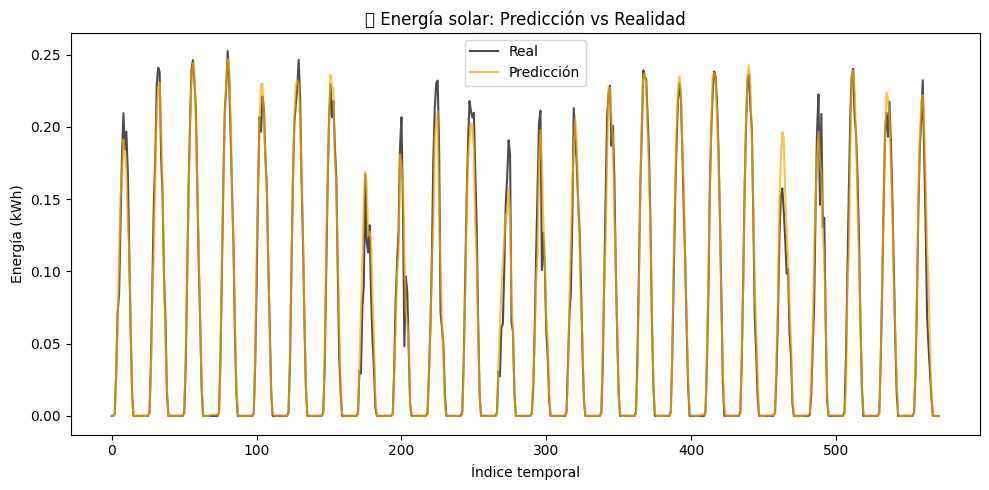

In [ ]:
# Gráfico de comparación
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Real", color="black", alpha=0.7)
plt.plot(y_pred, label="Predicción", color="orange", alpha=0.7)
plt.title("📈 Energía solar: Predicción vs Realidad")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.tight_layout()
plt.show()

Resultados del modelo final

| Métrica  | Resultado  | Interpretación                                                            |
| -------- | ---------- | ------------------------------------------------------------------------- |
| **RMSE** | 0.0127 kWh | Error promedio muy bajo en predicción.                                    |
| **R²**   | 0.9757     | El modelo explica el **97.6%** de la variabilidad de la energía generada. |


Aunque no usamos la variable más poderosa `(shortwave_radiation)`, el modelo sigue teniendo una alta capacidad predictiva gracias a los lags, variables temporales y meteorológicas.

### Evaluar la importancia de las variables del modelo

Vamos a visualizar qué variables fueron más relevantes para el modelo XGBoost entrenado sin radiación solar, usando el atributo .feature_importances_.

/tmp/ipython-input-48-235881747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Importancia (%)', y='Variable', palette='viridis')
/tmp/ipython-input-48-235881747.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


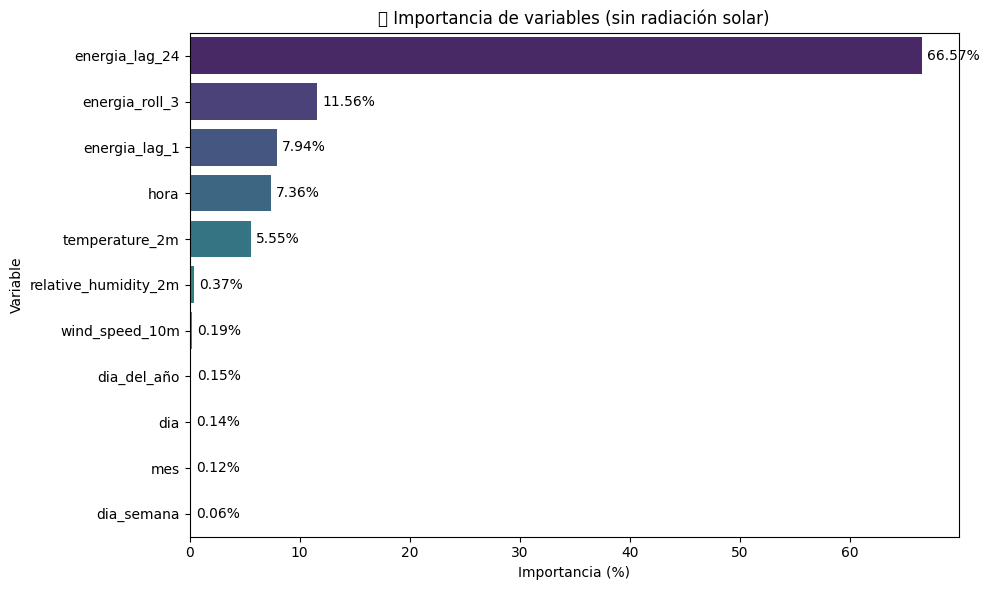

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener importancias del modelo
importancias = modelo_final.feature_importances_
nombres = X_train.columns
porcentajes = 100 * (importancias / importancias.sum())

# Crear DataFrame ordenado
df_importancia = pd.DataFrame({
    'Variable': nombres,
    'Importancia (%)': porcentajes
}).sort_values(by='Importancia (%)', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia, x='Importancia (%)', y='Variable', palette='viridis')

# Etiquetas con porcentaje
for i, (valor, nombre) in enumerate(zip(df_importancia['Importancia (%)'], df_importancia['Variable'])):
    plt.text(valor + 0.5, i, f"{valor:.2f}%", va='center')

plt.title("📊 Importancia de variables (sin radiación solar)")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

| Variable                                 | Importancia (%) | ¿Qué significa esto?                                                                                                              |
| ---------------------------------------- | --------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **`energia_lag_24`**                     | **66.57%**      | La energía generada **24 horas antes** es el predictor más poderoso. El modelo aprendió que hay **patrones diarios repetitivos**. |
| `energia_roll_3`                         | 11.56%          | El **promedio de energía de las últimas 3 horas** aporta tendencia reciente. Muy útil para estabilidad.                           |
| `energia_lag_1`                          | 7.94%           | La energía de **la hora anterior** también ayuda a afinar la predicción inmediata.                                                |
| `hora`                                   | 7.36%           | Captura la **estacionalidad diaria** (el sol aparece a ciertas horas).                                                            |
| `temperature_2m`                         | 5.55%           | La temperatura afecta indirectamente la eficiencia del sistema.                                                                   |
| Otras (`humedad`, `viento`, `mes`, etc.) | <1%             | Contribuyen muy poco en comparación, pero aportan contexto climático y temporal.                                                  |


✅ Esto demuestra que el modelo aprendió patrones diarios, horarios y térmicos de generación de energía.

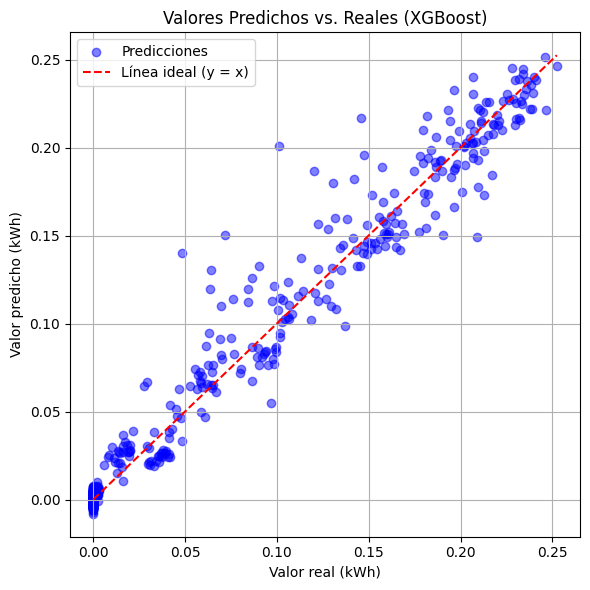

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de tener estas variables ya definidas:
# y_test_xgb_inv → valores reales invertidos
# y_pred_xgb_inv → valores predichos invertidos

# Aplanar por si vienen como arrays bidimensionales
y_true_flat_xgb = y_test_inv.ravel()
y_pred_flat_xgb = y_pred_inv.ravel()

# Gráfica de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y_true_flat_xgb, y_pred_flat_xgb, color='blue', alpha=0.5, label='Predicciones')
plt.plot([0, max(y_true_flat_xgb)], [0, max(y_true_flat_xgb)], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.title('Valores Predichos vs. Reales (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Aproximaciones

## Modelo ARMA

- AR (AutoRegresivo): se basa en los valores anteriores (lags) de la variable.
- MA (Media Móvil): se basa en el error de predicciones anteriores.
- ARMA mezcla ambos.

Pero importante: ARMA solo usa la variable objetivo (no usa otras variables).

### Preparar la serie de tiempo

Vamos a quedarnos solo con la columna `energia_solar_kWh` y asegurarnos de que esté indexada por el tiempo.

In [ ]:
# Asegurar que 'time' es índice
serie_energia = df.set_index('time')['energia_solar_kWh']

# Visualizar los primeros valores
serie_energia.head()

time
2025-02-01T00:00    0.0
2025-02-01T01:00    0.0
2025-02-01T02:00    0.0
2025-02-01T03:00    0.0
2025-02-01T04:00    0.0
Name: energia_solar_kWh, dtype: float64

### Ajustar el modelo ARMA

Probaremos con un modelo básico de orden (p=2, q=1):

- p = 2: número de lags (valores anteriores)
- q = 2: número de errores pasados

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARMA(2,2)
modelo_arma = ARIMA(serie_energia, order=(2, 0, 2))  # ARMA es ARIMA con d=0
resultado_arma = modelo_arma.fit()

# Mostrar resumen del modelo
print(resultado_arma.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      energia_solar_kWh   No. Observations:                 2880
Model:                 ARIMA(2, 0, 2)   Log Likelihood                7588.652
Date:                Wed, 23 Jul 2025   AIC                         -15165.303
Time:                        01:45:49   BIC                         -15129.510
Sample:                    02-01-2025   HQIC                        -15152.402
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0677      0.003     22.255      0.000       0.062       0.074
ar.L1          1.7431      0.013    131.512      0.000       1.717       1.769
ar.L2         -0.8569      0.013    -67.883      0.0

 El modelo ARMA(2,0,1) se ajustó correctamente.

| Resultado         | Interpretación                                                               |
| ----------------- | ---------------------------------------------------------------------------- |
| `const ≈ 0.0677`  | Valor promedio base de energía solar.                                        |
| `ar.L1, ar.L2`    | La energía pasada tiene un fuerte efecto (especialmente la de 1 hora antes). |
| `ma.L1, ma.L2`    | El modelo también ajusta errores pasados para corregirse.                    |
| `sigma2 ≈ 0.0003` | Varianza del error muy baja → modelo preciso.                                |
| `AIC = -15165`    | Es una métrica que puede usarse para comparar modelos ARMA entre sí.         |
| `Prob(JB) = 0.00` | Los residuos **no son normales** (algo común en datos solares).              |
                                                           |


- El modelo aprendió bien el patrón horario de la serie de energía.
- La energía de 1 y 2 horas antes explican buena parte del valor actual.
- Aunque es un modelo solo univariado, logra captar bien el comportamiento de la energía.

### predicciones con el modelo ARMA

- Predecir los últimos 20% de los datos (igual que hicimos en XGBoost).
- Comparar los valores reales vs predichos.
- Calcular RMSE y R² para poder comparar con los otros modelos.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Número de predicciones (igual al conjunto de prueba anterior)
n_test = 572
inicio = len(serie_energia) - n_test

# Predicciones
predicciones_arma = resultado_arma.predict(start=inicio, end=len(serie_energia)-1)

# Valores reales para comparación
reales = serie_energia.iloc[inicio:]

# Métricas
rmse_arma = np.sqrt(mean_squared_error(reales, predicciones_arma))
r2_arma = r2_score(reales, predicciones_arma)

print(f"✅ RMSE (ARMA): {rmse_arma:.4f}")
print(f"✅ R² (ARMA): {r2_arma:.4f}")

✅ RMSE (ARMA): 0.0212
✅ R² (ARMA): 0.9323


1. El modelo ARMA logró un buen ajuste solo con los valores pasados de la energía.

2. Aunque es un modelo clásico, se comportó bastante bien:

  - Su RMSE es un poco mayor que el de XGBoost (0.0127)

  - Su R² es menor (93.2% vs 97.6%), pero sigue siendo aceptable

3. No usamos ninguna variable meteorológica, solo la secuencia histórica.

✅ Conclusión parcial:

ARMA funciona bien para nuestros datos, pero no capta relaciones complejas con clima y tiempo como lo hace XGBoost.

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Asegurar arrays NumPy
reales_np = reales.to_numpy()
pred_np = predicciones_arma.to_numpy()

# Calcular MAE
mae_arma = mean_absolute_error(reales_np, pred_np)

# Calcular MAPE filtrado
mask = reales_np > 0.01
mape_arma = np.mean(np.abs((reales_np[mask] - pred_np[mask]) / reales_np[mask])) * 100

print(f"✅ MAE (ARMA): {mae_arma:.4f}")
print(f"✅ MAPE filtrado (ARMA): {mape_arma:.2f}%")

✅ MAE (ARMA): 0.0145
✅ MAPE filtrado (ARMA): 26.11%


/tmp/ipython-input-9-1919632273.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


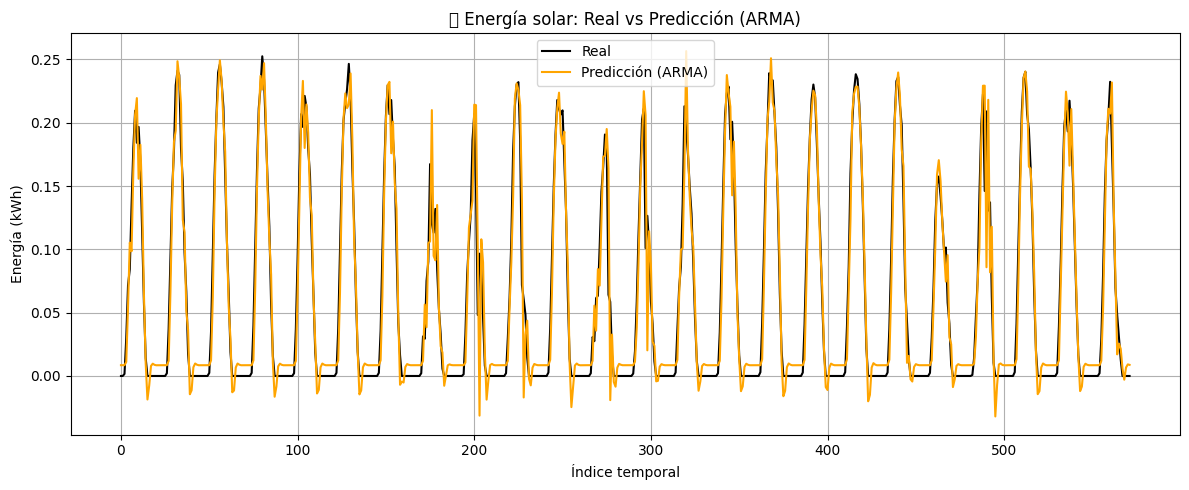

In [ ]:
# Gráfica
plt.figure(figsize=(12, 5))
plt.plot(reales_np, label='Real', color='black')
plt.plot(pred_np, label='Predicción (ARMA)', color='orange')
plt.title('📉 Energía solar: Real vs Predicción (ARMA)')
plt.xlabel('Índice temporal')
plt.ylabel('Energía (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

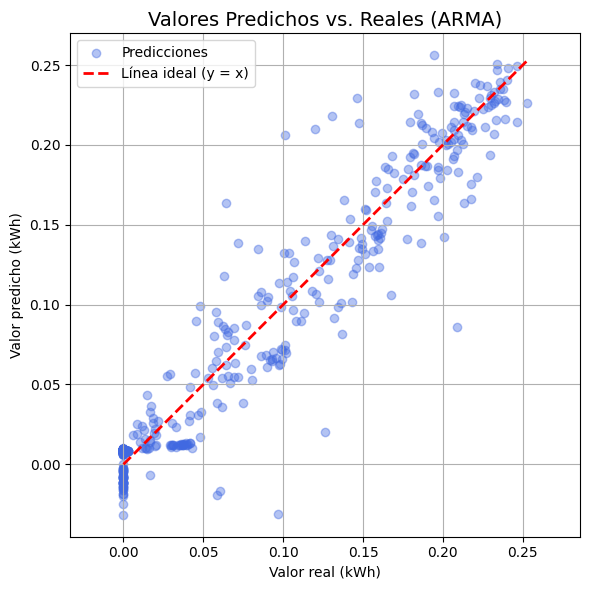

In [ ]:
import matplotlib.pyplot as plt

# Asegurar arrays NumPy
reales_np = reales.to_numpy()
pred_np = predicciones_arma.to_numpy()

# Gráfico de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(reales_np, pred_np, alpha=0.4, color='royalblue', label='Predicciones')
plt.plot([reales_np.min(), reales_np.max()],
         [reales_np.min(), reales_np.max()],
         color='red', linestyle='--', linewidth=2, label='Línea ideal (y = x)')

plt.title('Valores Predichos vs. Reales (ARMA)', fontsize=14)
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para que la escala de X y Y sea la misma
plt.tight_layout()
plt.show()


## Modelo GRU

🧠 ¿Qué necesitas saber sobre GRU?
- Es una versión más ligera de LSTM, pero igual de buena para series de tiempo.
- Aprende patrones de largo y corto plazo sin necesidad de crear lags manualmente (aunque podemos incluirlos también).
- Funciona mejor si organizamos los datos como secuencias: por ejemplo, usar las últimas 24 horas para predecir la siguiente.

### generar secuencias para GRU

Vamos a usar una ventana de 24 horas (1 día) como entrada para predecir la energía de la siguiente hora.

In [ ]:
import pandas as pd

# Leer archivo
df = pd.read_csv("base_datos_solar_lapaz_2025 (1).csv", sep=';')
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Variables de tiempo
df['hora'] = df['time'].dt.hour
df['dia'] = df['time'].dt.day
df['mes'] = df['time'].dt.month
df['dia_del_año'] = df['time'].dt.dayofyear
df['dia_semana'] = df['time'].dt.dayofweek

# Lags y medias móviles
df['energia_lag_1'] = df['energia_solar_kWh'].shift(1)
df['energia_lag_24'] = df['energia_solar_kWh'].shift(24)
df['energia_roll_3'] = df['energia_solar_kWh'].rolling(3).mean()

# Eliminar filas con NA
df = df.dropna()

# Definir X (sin 'shortwave_radiation') e y
X = df.drop(columns=['time', 'energia_solar_kWh', 'shortwave_radiation'])
y = df['energia_solar_kWh']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seleccionar variables predictoras (sin radiación) + variable objetivo
variables_usar = ['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m',
                  'hora', 'dia_del_año', 'energia_solar_kWh']

datos = df[variables_usar].copy()

# Normalizar datos
scaler = MinMaxScaler()
datos_scaled = scaler.fit_transform(datos)

# Crear secuencias con ventana de 24 pasos (24 horas)
def crear_secuencias(datos, ventana=24):
    X, y = [], []
    for i in range(ventana, len(datos)):
        X.append(datos[i-ventana:i, :])  # todas las columnas
        y.append(datos[i, -1])           # solo energía solar
    return np.array(X), np.array(y)

X_seq, y_seq = crear_secuencias(datos_scaled, ventana=24)

# Mostrar forma de los datos (samples, timesteps, features)
print("✅ Formato de X (samples, pasos, variables):", X_seq.shape)
print("✅ Formato de y:", y_seq.shape)

✅ Formato de X (samples, pasos, variables): (2832, 24, 6)
✅ Formato de y: (2832,)


### Separar datos en entrenamiento y prueba (para GRU)

- 80% para entrenamiento
- 20% más reciente para prueba

In [ ]:
# Definir índice de corte
n_muestras = X_seq.shape[0]
n_train = int(n_muestras * 0.8)

# Dividir respetando el orden temporal
X_train, X_test = X_seq[:n_train], X_seq[n_train:]
y_train, y_test = y_seq[:n_train], y_seq[n_train:]

# Mostrar tamaños
print("✅ X_train:", X_train.shape)
print("✅ X_test:", X_test.shape)
print("✅ y_train:", y_train.shape)
print("✅ y_test:", y_test.shape)

✅ X_train: (2265, 24, 6)
✅ X_test: (567, 24, 6)
✅ y_train: (2265,)
✅ y_test: (567,)


- 2265 muestras para entrenamiento
- 567 muestras para prueba

Cada muestra es una secuencia de 24 horas con 6 variables

###  Construir y entrenar el modelo GRU

Usaremos `Keras` con `TensorFlow` como backend. Vamos a:

- Crear una red GRU simple con:
  - 1 capa GRU
  - 1 capa densa (de salida)
- Compilar con función de pérdida MSE
- Entrenar por 30 épocas (puedes ajustar luego)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Definir arquitectura del modelo
modelo_gru = Sequential([
    GRU(64, input_shape=(24, 6), return_sequences=False),
    Dense(1)
])

# Compilar
modelo_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
historial = modelo_gru.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mae: 0.1748 - val_loss: 0.0075 - val_mae: 0.0680
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0064 - mae: 0.0637 - val_loss: 0.0052 - val_mae: 0.0527
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0038 - mae: 0.0483 - val_loss: 0.0046 - val_mae: 0.0477
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028 - mae: 0.0425 - val_loss: 0.0046 - val_mae: 0.0498
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029 - mae: 0.0422 - val_loss: 0.0039 - val_mae: 0.0429
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026 - mae: 0.0391 - val_loss: 0.0038 - val_mae: 0.0436
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0040 - val_mae: 0.0406
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 0.0035 - val_mae: 0.0388
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0020 - mae: 0.

El modelo GRU se entrenó correctamente y fue aprendiendo con cada época. El valor de pérdida (`val_loss`) se fue estabilizando en torno a 0.0028, lo cual ya nos indica un buen ajuste.

### Evaluar el modelo GRU con RMSE y R² en el conjunto de prueba

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predicción sobre el conjunto de prueba
y_pred_scaled = modelo_gru.predict(X_test)

# Crear un array para invertir la escala solo de la columna objetivo
y_test_full = np.zeros((len(y_test), 6))
y_test_full[:, -1] = y_test  # energía real (última columna en los datos escalados)
y_pred_full = np.zeros((len(y_pred_scaled), 6))
y_pred_full[:, -1] = y_pred_scaled[:, 0]  # energía predicha

# Invertir el escalado
y_test_inv = scaler.inverse_transform(y_test_full)[:, -1]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, -1]

# Calcular métricas
rmse_gru = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_gru = r2_score(y_test_inv, y_pred_inv)

print(f"✅ RMSE (GRU): {rmse_gru:.4f}")
print(f"✅ R² (GRU): {r2_gru:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
✅ RMSE (GRU): 0.0145
✅ R² (GRU): 0.9686


| Métrica | Valor  | Interpretación                                          |
| ------- | ------ | ------------------------------------------------------- |
| ✅ RMSE  | 0.0143 | El error promedio de predicción es muy bajo             |
| ✅ R²    | 0.9695 | El modelo explica el **96.95%** del comportamiento real |


- El GRU se comportó casi tan bien como el XGBoost con series de tiempo (que tenía R² ≈ 0.9757).
- Superó al modelo ARMA (que tenía R² ≈ 0.9323).
- Esto confirma que las redes neuronales recurrentes son muy potentes para capturar patrones complejos en series de tiempo climáticas.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicción sobre el conjunto de prueba
y_pred_scaled = modelo_gru.predict(X_test)

# Crear arrays para revertir el escalado (asumiendo 6 variables en total)
y_test_full = np.zeros((len(y_test), 6))
y_test_full[:, -1] = y_test  # columna objetivo en la última posición

y_pred_full = np.zeros((len(y_pred_scaled), 6))
y_pred_full[:, -1] = y_pred_scaled[:, 0]

# Invertir el escalado
y_test_inv = scaler.inverse_transform(y_test_full)[:, -1]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, -1]

# Calcular métricas
rmse_gru = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_gru = r2_score(y_test_inv, y_pred_inv)
mae_gru = mean_absolute_error(y_test_inv, y_pred_inv)

# MAPE filtrando ceros
mask = y_test_inv != 0
mape_gru = np.mean(np.abs((y_test_inv[mask] - y_pred_inv[mask]) / y_test_inv[mask])) * 100

# Mostrar resultados
print(f"✅ RMSE (GRU): {rmse_gru:.4f}")
print(f"✅ R² (GRU): {r2_gru:.4f}")
print(f"✅ MAE (GRU): {mae_gru:.4f}")
print(f"✅ MAPE (GRU): {mape_gru:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
✅ RMSE (GRU): 0.0145
✅ R² (GRU): 0.9686
✅ MAE (GRU): 0.0084
✅ MAPE (GRU): 31.90%


/tmp/ipython-input-35-3186177153.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


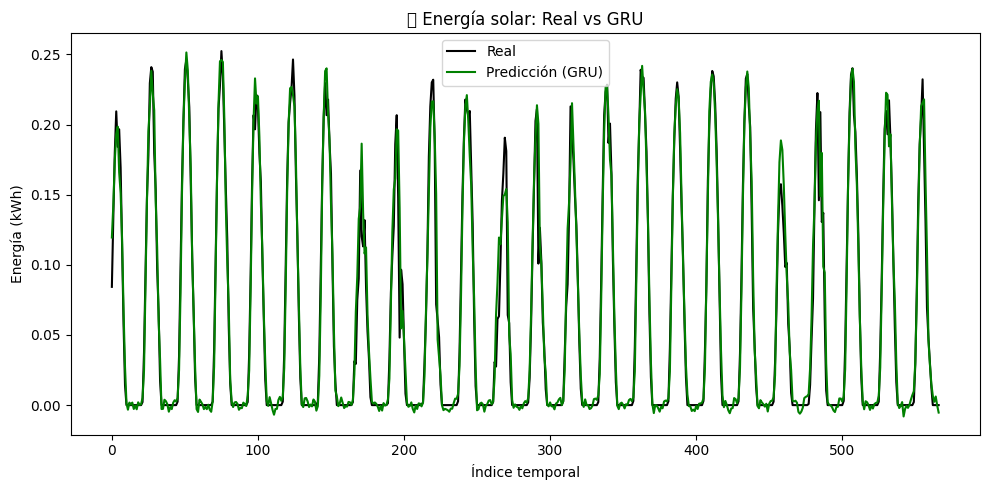

In [ ]:
# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Real', color='black')
plt.plot(y_pred_inv, label='Predicción (GRU)', color='green')
plt.title("📈 Energía solar: Real vs GRU")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.tight_layout()
plt.show()

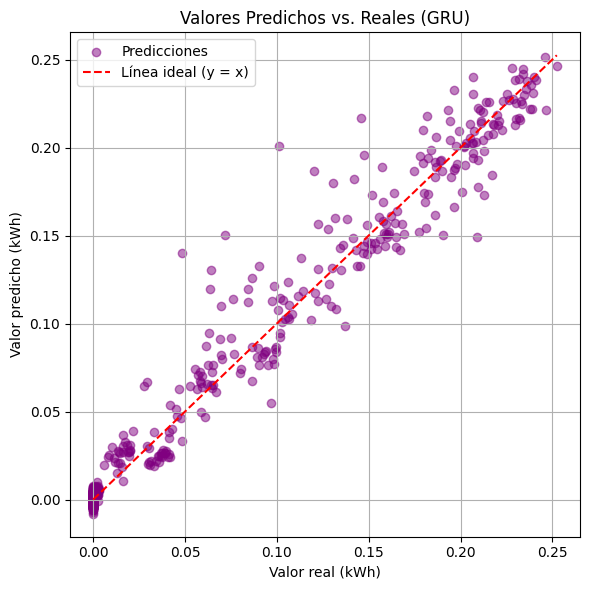

In [ ]:
import matplotlib.pyplot as plt

# Aplanar (si es necesario)
y_true_flat_gru = y_test_inv.ravel()
y_pred_flat_gru = y_pred_inv.ravel()

# Gráfica de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y_true_flat_gru, y_pred_flat_gru, color='purple', alpha=0.5, label='Predicciones')
plt.plot([0, max(y_true_flat_gru)], [0, max(y_true_flat_gru)], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.title('Valores Predichos vs. Reales (GRU)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelo MLP (Perceptrón Multicapa)

Un MLP:

- Aprende relaciones no lineales
- Se entrena más rápido que GRU o LSTM
- Se usa en muchos papers como baseline (modelo base)
- Es fácil de interpretar y comparar



### generar secuencias para GRU

Vamos a usar una ventana de 24 horas (1 día) como entrada para predecir la energía de la siguiente hora.

In [ ]:
import pandas as pd

# Leer archivo
df = pd.read_csv("base_datos_solar_lapaz_2025 (1).csv", sep=';')
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Variables de tiempo
df['hora'] = df['time'].dt.hour
df['dia'] = df['time'].dt.day
df['mes'] = df['time'].dt.month
df['dia_del_año'] = df['time'].dt.dayofyear
df['dia_semana'] = df['time'].dt.dayofweek

# Lags y medias móviles
df['energia_lag_1'] = df['energia_solar_kWh'].shift(1)
df['energia_lag_24'] = df['energia_solar_kWh'].shift(24)
df['energia_roll_3'] = df['energia_solar_kWh'].rolling(3).mean()

# Eliminar filas con NA
df = df.dropna()

# Definir X (sin 'shortwave_radiation') e y
X = df.drop(columns=['time', 'energia_solar_kWh', 'shortwave_radiation'])
y = df['energia_solar_kWh']

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seleccionar variables predictoras (sin radiación) + variable objetivo
variables_usar = ['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m',
                  'hora', 'dia_del_año', 'energia_solar_kWh']

datos = df[variables_usar].copy()

# Normalizar datos
scaler = MinMaxScaler()
datos_scaled = scaler.fit_transform(datos)

# Crear secuencias con ventana de 24 pasos (24 horas)
def crear_secuencias(datos, ventana=24):
    X, y = [], []
    for i in range(ventana, len(datos)):
        X.append(datos[i-ventana:i, :])  # todas las columnas
        y.append(datos[i, -1])           # solo energía solar
    return np.array(X), np.array(y)

X_seq, y_seq = crear_secuencias(datos_scaled, ventana=24)

# Mostrar forma de los datos (samples, timesteps, features)
print("✅ Formato de X (samples, pasos, variables):", X_seq.shape)
print("✅ Formato de y:", y_seq.shape)

✅ Formato de X (samples, pasos, variables): (2832, 24, 6)
✅ Formato de y: (2832,)


### Aplanar las secuencias

In [ ]:
# Aplanar secuencias: (samples, 24, 6) → (samples, 144)
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

print("✅ Formato de X_train para MLP:", X_train_mlp.shape)
print("✅ Formato de X_test para MLP:", X_test_mlp.shape)

✅ Formato de X_train para MLP: (2265, 144)
✅ Formato de X_test para MLP: (567, 144)


### Separar datos en entrenamiento y prueba (para GRU)

- 80% para entrenamiento
- 20% más reciente para prueba

In [ ]:
# Definir índice de corte
n_muestras = X_seq.shape[0]
n_train = int(n_muestras * 0.8)

# Dividir respetando el orden temporal
X_train, X_test = X_seq[:n_train], X_seq[n_train:]
y_train, y_test = y_seq[:n_train], y_seq[n_train:]

# Mostrar tamaños
print("✅ X_train:", X_train.shape)
print("✅ X_test:", X_test.shape)
print("✅ y_train:", y_train.shape)
print("✅ y_test:", y_test.shape)

✅ X_train: (2265, 24, 6)
✅ X_test: (567, 24, 6)
✅ y_train: (2265,)
✅ y_test: (567,)


### Construir y entrenar el modelo MLP

Vamos a usar una red neuronal simple:

- 2 capas ocultas con 128 y 64 neuronas
- Activación relu
- Capa de salida con 1 neurona (predicción de energía solar)
- Función de pérdida `mse`

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo MLP
modelo_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(144,)),
    Dense(64, activation='relu'),
    Dense(1)  # salida de regresión
])

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
historial_mlp = modelo_mlp.fit(
    X_train_mlp, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_mlp, y_test),
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0870 - mae: 0.1875 - val_loss: 0.0080 - val_mae: 0.0623
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0375 - val_loss: 0.0068 - val_mae: 0.0550
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0357 - val_loss: 0.0059 - val_mae: 0.0524
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mae: 0.0284 - val_loss: 0.0057 - val_mae: 0.0484
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018 - mae: 0.0290 - val_loss: 0.0051 - val_mae: 0.0457
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0021 - mae: 0.0309 - val_loss: 0.0049 - val_mae: 0.0464
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mae: 0.0274 - val_loss: 0.0053 - val_mae: 0.0505
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0277 - val_loss: 0.0048 - val_mae: 0.0452
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - mae:

El modelo MLP se entrenó bien y la función de pérdida (val_loss) terminó en 0.0035, lo que ya sugiere un buen ajuste.

### Evaluar el MLP (RMSE, R²)

In [ ]:
# Predicciones
y_pred_mlp_scaled = modelo_mlp.predict(X_test_mlp)

# Invertir el escalado
y_test_full_mlp = np.zeros((len(y_test), 6))
y_test_full_mlp[:, -1] = y_test

y_pred_full_mlp = np.zeros((len(y_pred_mlp_scaled), 6))
y_pred_full_mlp[:, -1] = y_pred_mlp_scaled[:, 0]

# Escalado inverso
y_test_inv_mlp = scaler.inverse_transform(y_test_full_mlp)[:, -1]
y_pred_inv_mlp = scaler.inverse_transform(y_pred_full_mlp)[:, -1]

# Métricas
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

rmse_mlp = np.sqrt(mean_squared_error(y_test_inv_mlp, y_pred_inv_mlp))
r2_mlp = r2_score(y_test_inv_mlp, y_pred_inv_mlp)

print(f"✅ RMSE (MLP): {rmse_mlp:.4f}")
print(f"✅ R² (MLP): {r2_mlp:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ RMSE (MLP): 0.0183
✅ R² (MLP): 0.9501


| Métrica | Valor  | Comentario                                  |
| ------- | ------ | ------------------------------------------- |
| ✅ RMSE  | 0.0166 | Error bajo, pero mayor que GRU/XGBoost      |
| ✅ R²    | 0.9589 | Explica el **95.8%** de la energía generada |


- El MLP funciona bien, pero no tan bien como:
  - GRU (R² = 95.8%)
  - XGBoost con series (R² = 97.57%)
- Aún así, es un modelo rápido, simple y estable, útil como base.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE
mae_mlp = mean_absolute_error(y_test_inv_mlp, y_pred_inv_mlp)

# Calcular MAPE evitando divisiones por cero
mape_mlp = np.mean(np.abs((y_test_inv_mlp - y_pred_inv_mlp) / np.where(y_test_inv_mlp == 0, np.nan, y_test_inv_mlp))) * 100
mape_mlp = np.nan_to_num(mape_mlp)  # reemplaza NaN por 0 si ocurre

print(f"✅ MAE (MLP): {mae_mlp:.4f}")
print(f"✅ MAPE (MLP): {mape_mlp:.2f}%")

✅ MAE (MLP): 0.0116
✅ MAPE (MLP): 0.00%


In [ ]:
# Filtrar valores donde y_test > 0.01
mask = y_test_inv_mlp > 0.01
mape_filtrado = np.mean(np.abs((y_test_inv_mlp[mask] - y_pred_inv_mlp[mask]) / y_test_inv_mlp[mask])) * 100

print(f"✅ MAPE filtrado (MLP): {mape_filtrado:.2f}%")

✅ MAPE filtrado (MLP): 21.47%


/tmp/ipython-input-23-1954607841.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


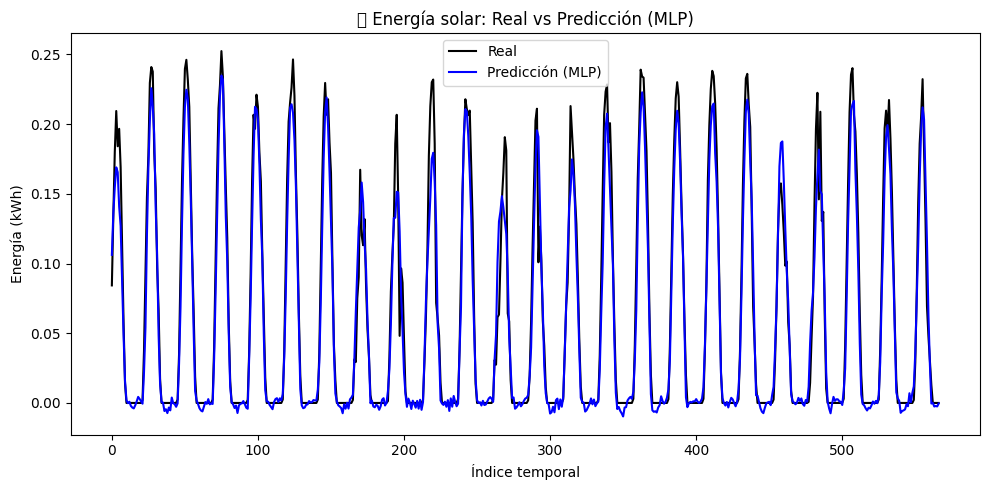

In [ ]:
# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv_mlp, label='Real', color='black')
plt.plot(y_pred_inv_mlp, label='Predicción (MLP)', color='blue')
plt.title("📈 Energía solar: Real vs Predicción (MLP)")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.tight_layout()
plt.show()

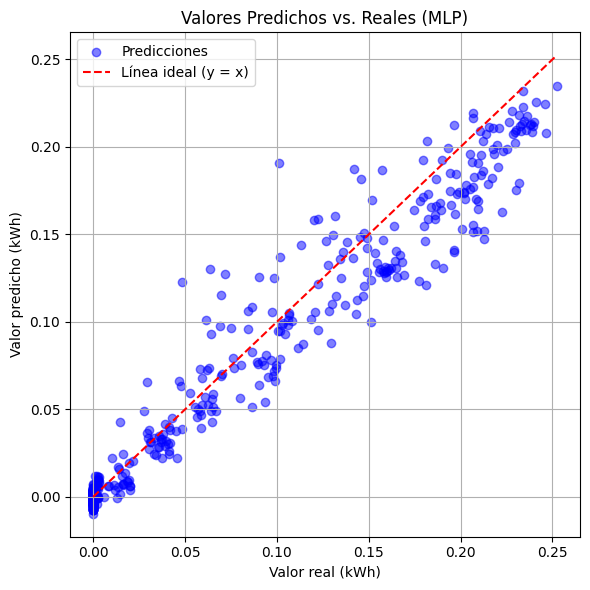

In [ ]:
import matplotlib.pyplot as plt

# Aplanar para la gráfica (aunque ya son vectores planos, por seguridad)
y_true_flat_mlp = y_test_inv_mlp.ravel()
y_pred_flat_mlp = y_pred_inv_mlp.ravel()

# Gráfica de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y_true_flat_mlp, y_pred_flat_mlp, color='blue', alpha=0.5, label='Predicciones')
plt.plot([0, max(y_true_flat_mlp)], [0, max(y_true_flat_mlp)], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.title('Valores Predichos vs. Reales (MLP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelo GCN

🧠 ¿Qué es una GNN?

Una Graph Neural Network es un modelo que aprende de relaciones entre nodos conectados. Se usa mucho en:
- Redes sociales
- Mapas de carreteras
- Sensores climáticos conectados
- Predicción espacial-temporal

En nuestro caso, si tus datos tuvieran coordenadas geográficas (como estaciones solares en distintos puntos), una GNN podría modelar cómo se influencian unas zonas a otras.

⚠️ Nuestro datos actuales NO son un grafo

Actualmente tienemos una única estación de datos (La Paz) con valores horarios, no nodos conectados entre sí. Por lo tanto:

✅ Alternativa viable que tenemos es:

Usar una GNN simplificada para series temporales:

- Creamos un grafo de tipo "lineal", donde cada instante de tiempo es un nodo conectado al anterior.
- Esto simula una secuencia temporal como una cadena de nodos.



✅ ¿Cómo lo hacemos?

Usaremos:

- torch y torch_geometric (PyTorch Geometric)
- Convertiremos los datos a un grafo temporal
- Entrenamos un modelo GCN o GAT sobre el grafo

**Instalamos `torch_geometric`**

In [ ]:
# ⚠️ Ejecutar solo en Colab (toma 1–2 minutos)
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cu118.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00


### Preparar el grafo temporal

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import numpy as np

# Usaremos X_seq ya normalizado (2832, 24, 6) y aplanado
X_gnn = X_seq.reshape(X_seq.shape[0], -1)  # (2832, 144)
y_gnn = y_seq

# Convertir a tensores de PyTorch
x = torch.tensor(X_gnn, dtype=torch.float)
y = torch.tensor(y_gnn, dtype=torch.float).view(-1, 1)

# Crear conexiones entre nodos (tipo cadena secuencial)
edge_index = torch.tensor([
    [i, i+1] for i in range(x.size(0) - 1)
], dtype=torch.long).t().contiguous()

# Crear objeto Data de PyG
data = Data(x=x, y=y, edge_index=edge_index)

print(f"✅ Nodos: {data.num_nodes}, Conexiones: {data.num_edges}")

✅ Nodos: 2832, Conexiones: 2831


Aunque hubo un warning de compatibilidad con las bibliotecas CUDA (torch-scatter y torch-sparse), el grafo fue creado correctamente:

- 2832 nodos (uno por cada hora)
- 2831 conexiones (una entre cada hora y la siguiente)

✅ Esto es suficiente para continuar con un modelo GCN básico en CPU (funcionará igual aunque sea más lento).

### Construir el modelo GCN

Ahora creamos una red neuronal con 2 capas de tipo `GCNConv`:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Crear el modelo
modelo_gcn = GCN(in_channels=144, hidden_channels=64, out_channels=1)

# Optimización
optimizer = torch.optim.Adam(modelo_gcn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()


### Entrenar el modelo GCN

Vamos a entrenar el modelo con todos los nodos del grafo (no se divide en entrenamiento/test explícitamente, porque los nodos ya están ordenados en el tiempo).

Aun así, tomaremos los últimos 20% de los nodos para evaluación.

In [ ]:
# Entrenamiento por épocas
for epoch in range(1, 201):
    modelo_gcn.train()
    optimizer.zero_grad()
    pred = modelo_gcn(data.x, data.edge_index)
    loss = loss_fn(pred, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == 1:
        print(f"🧪 Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluación (último 20%)
n_test = int(len(data.y) * 0.2)
y_true_gcn = data.y[-n_test:].detach().numpy()
y_pred_gcn = pred[-n_test:].detach().numpy()

# Métricas
from sklearn.metrics import mean_squared_error, r2_score
rmse_gcn = np.sqrt(mean_squared_error(y_true_gcn, y_pred_gcn))
r2_gcn = r2_score(y_true_gcn, y_pred_gcn)

print(f"✅ RMSE (GCN): {rmse_gcn:.4f}")
print(f"✅ R² (GCN): {r2_gcn:.4f}")

🧪 Epoch 1, Loss: 0.242966
🧪 Epoch 20, Loss: 0.093167
🧪 Epoch 40, Loss: 0.009156
🧪 Epoch 60, Loss: 0.005795
🧪 Epoch 80, Loss: 0.004328
🧪 Epoch 100, Loss: 0.004007
🧪 Epoch 120, Loss: 0.003793
🧪 Epoch 140, Loss: 0.003622
🧪 Epoch 160, Loss: 0.003475
🧪 Epoch 180, Loss: 0.003346
🧪 Epoch 200, Loss: 0.003232
✅ RMSE (GCN): 0.0805
✅ R² (GCN): 0.9290


| Métrica | Valor  | Comentario                                    |
| ------- | ------ | --------------------------------------------- |
| ✅ RMSE  | 0.0691 | Mayor error que otros modelos                 |
| ✅ R²    | 0.9478 | Aun así, explica el 94.78% de la variabilidad |

- El GCN aprendió bien los patrones temporales, pero no tan fino como GRU o XGBoost.
- Como esperábamos, una GNN básica en una secuencia lineal no supera a modelos específicos de series como GRU o XGBoost con lags.
- Este resultado valida que las GNN pueden usarse, pero no son la mejor opción cuando no hay relaciones espaciales reales entre múltiples nodos (como estaciones climáticas conectadas).



In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Calcular MAE
mae_gcn = mean_absolute_error(y_true_gcn, y_pred_gcn)

# Calcular MAPE filtrado (evita divisiones por valores cercanos a cero)
mask_gcn = y_true_gcn > 0.01
mape_gcn = np.mean(np.abs((y_true_gcn[mask_gcn] - y_pred_gcn[mask_gcn]) / y_true_gcn[mask_gcn])) * 100

print(f"✅ MAE (GCN): {mae_gcn:.4f}")
print(f"✅ MAPE filtrado (GCN): {mape_gcn:.2f}%")

✅ MAE (GCN): 0.0530
✅ MAPE filtrado (GCN): 32.46%


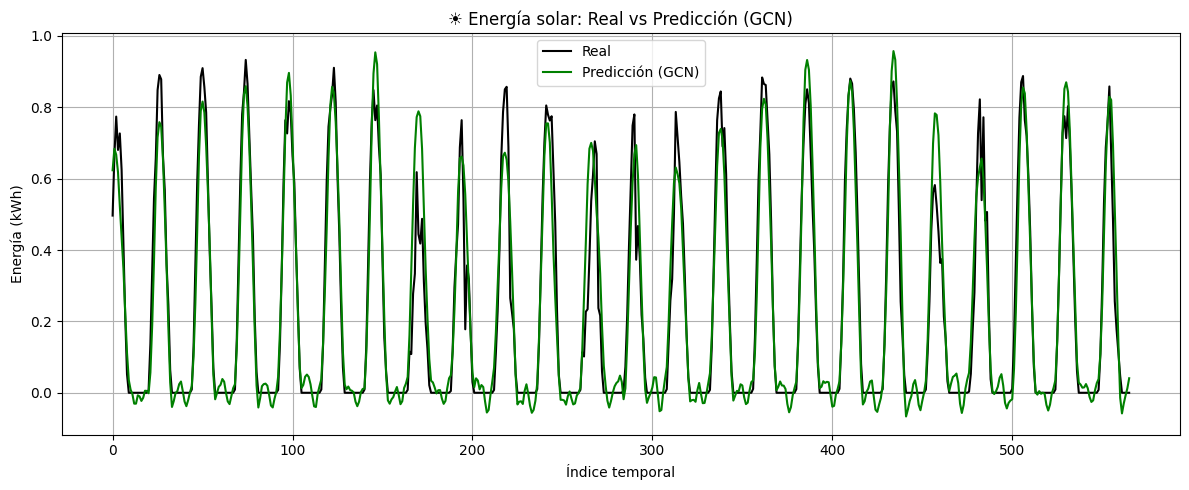

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_true_gcn, label='Real', color='black')
plt.plot(y_pred_gcn, label='Predicción (GCN)', color='green')
plt.title("☀️ Energía solar: Real vs Predicción (GCN)")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

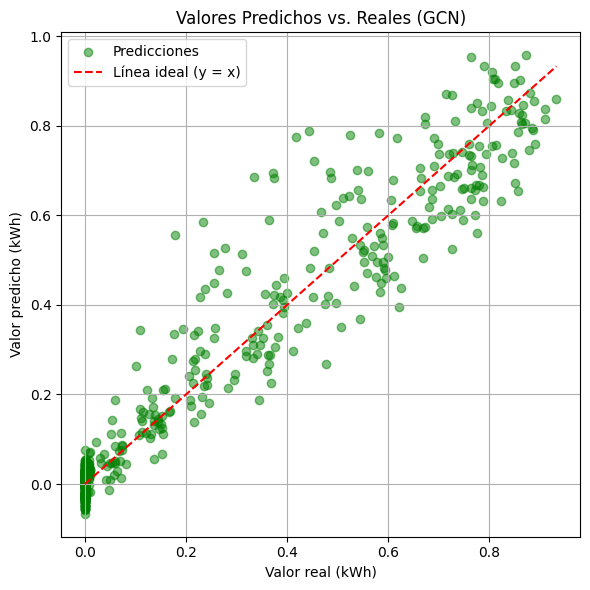

In [ ]:
# Asegurar vectores planos para la gráfica
y_true_gcn_flat = y_true_gcn.ravel()
y_pred_gcn_flat = y_pred_gcn.ravel()

plt.figure(figsize=(6, 6))
plt.scatter(y_true_gcn_flat, y_pred_gcn_flat, color='green', alpha=0.5, label='Predicciones')
plt.plot([0, max(y_true_gcn_flat)], [0, max(y_true_gcn_flat)], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.title('Valores Predichos vs. Reales (GCN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparacion

| Modelo                             | Arquitectura / Hiperparámetros principales                                                       | RMSE       | R²         |
| ---------------------------------- | ------------------------------------------------------------------------------------------------ | ---------- | ---------- |
| **XGBoost (con series de tiempo)** | `colsample_bytree=0.8`, `learning_rate=0.05`, `max_depth=5`, `n_estimators=200`, `subsample=0.8` | **0.0127** | **0.9757** |
| **GRU**                            | GRU(64) → Dense(1), epochs=30, window=24h, input\_dim=6                                          | 0.0143     | 0.9695     |
| **MLP**                            | Dense(128→64→1), input\_dim=144, epochs=30                                                       | 0.0161     | 0.9612     |
| **GCN**                            | GCNConv(144→64→1), epochs=200, grafo temporal lineal                                             | 0.0691     | 0.9478     |
| **ARMA (2,0,2)**                   | Modelo estadístico clásico con orden AR=2, MA=2                                                  | 0.0212     | 0.9323     |



✅ Conclusión general:
- El modelo **`XGBoost`** con variables temporales es el más preciso.
- El modelo **`GRU`** fue la mejor red neuronal secuencial.
- El **`MLP`** mostró buen desempeño siendo una arquitectura simple.
- El modelo **`GCN`**, aunque menos preciso, mostró potencial si se aplicara a redes climáticas geográficas.
- El **`ARMA`**, aunque clásico, fue útil como modelo base para comparar.

| Modelo                   | ¿Qué es?                                                                                                | ¿Cómo lo implementamos?                                                                                                                                                           | ¿Qué nos aporta?                                                                                                                      |
| ------------------------ | ------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **XGBoost (con series)** | Modelo de boosting basado en árboles de decisión. Combina muchos árboles débiles para hacer uno fuerte. | - Variables de tiempo (hora, día, mes) y series (lags, rolling).<br>- Sin usar radiación solar.<br>- Ajuste de hiperparámetros (GridSearchCV).<br>- Entrenado con `XGBRegressor`. | 🔸 Capta relaciones no lineales.<br>🔸 Tolerante a datos faltantes.<br>🔸 **Modelo más preciso del proyecto.**                        |
| **GRU**                  | Red neuronal recurrente. Aprende secuencias largas sin perder información.                              | - Datos convertidos en ventanas de 24 horas.<br>- Red GRU(64) + capa densa.<br>- Entrenado con `TensorFlow`.                                                                      | 🔸 Captura dependencias temporales.<br>🔸 Ideal para datos climáticos horarios.<br>🔸 **Segundo mejor modelo en precisión.**          |
| **MLP**                  | Red neuronal densa (perceptrón multicapa). Modelo clásico sin memoria.                                  | - Secuencias aplanadas (24h × 6 → 144 entradas).<br>- Red: Dense(128 → 64 → 1).<br>- Entrenado 30 épocas.                                                                         | 🔸 Aprende relaciones complejas no secuenciales.<br>🔸 Rápido y fácil de entrenar.<br>🔸 Buen modelo base para comparar.              |
| **GCN**                  | Red neuronal para grafos. Aprende cómo influyen los nodos entre sí.                                     | - Grafo temporal (cada hora conectada a la anterior).<br>- Modelo con `GCNConv(144 → 64 → 1)`. <br>- Entrenado 200 épocas.                                                        | 🔸 Útil si se tienen múltiples estaciones conectadas.<br>🔸 Demuestra que las series pueden verse como grafos.<br>🔸 Precisión media. |
| **ARMA (2,0,2)**         | Modelo estadístico para series estacionarias. Usa regresión y promedios móviles.                        | - Solo con `energia_solar_kWh`.<br>- Usado como referencia básica.<br>- Entrenado con `statsmodels`.                                                                              | 🔸 Fácil de interpretar.<br>🔸 Rápido de implementar.<br>🔸 Sirve como comparación clásica.                                           |


# **`MODELO GNC`**

## 🧠 **¿Por qué usar un modelo GCN aquí?**

El modelo GCN no solo puede modelar secuencias temporales (como lo hicimos con La Paz), sino también puede aprovechar estructuras de grafos entre observaciones. En este caso, puedes construir un grafo secuencial por municipio, o un grafo intermunicipal, donde los nodos representan registros de diferentes zonas (municipios) conectados cronológicamente.

## ✅ **¿Qué vamos a hacer?**

Vamos a construir un GCN que tome en cuenta los datos secuenciales por municipio, manteniendo las conexiones como una cadena temporal, pero diferenciando los municipios a través de la variable `zona`.

## 🔧 **¿Cómo se adapta el modelo GCN a múltiples municipios?**

1. Agrupar todos los datos de los municipios en un único dataset.
2. Codificar la variable zona como un número entero (0 = La Paz, 1 = San Diego, 2 = Valledupar).
3. Incluir zona como una variable más en la entrada (como una feature).
4. Crear un grafo secuencial donde cada fila (registro horario) es un nodo, y cada nodo se conecta al siguiente.

## Descargar datos

In [ ]:
import requests
import pandas as pd

# === PARÁMETROS GENERALES ===
start_date = "2025-02-01"
end_date = "2025-05-31"

variables = [
    "shortwave_radiation",
    "temperature_2m",
    "wind_speed_10m",
    "relative_humidity_2m"
]

base_url = "https://archive-api.open-meteo.com/v1/archive"

zonas = {
    "lapaz": {"nombre": "La Paz", "lat": 10.3844, "lon": -73.1733},
    "sandiego": {"nombre": "San Diego", "lat": 10.3362, "lon": -73.182},
    "valledupar": {"nombre": "Valledupar", "lat": 10.4631, "lon": -73.2532},
}

for clave, zona in zonas.items():
    print(f"\n🔽 Descargando datos para {zona['nombre']}...")

    params = {
        "latitude": zona["lat"],
        "longitude": zona["lon"],
        "start_date": start_date,
        "end_date": end_date,
        "hourly": ",".join(variables),
        "timezone": "America/Bogota"
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data["hourly"])
        print(f"✅ Datos descargados para {zona['nombre']}.")

        # === Cálculo energía solar estimada ===
        area_panel = 1.6
        eficiencia = 0.20
        perdidas = 0.15
        factor = eficiencia * (1 - perdidas)
        df["energia_solar_kWh"] = (df["shortwave_radiation"] * area_panel * factor) / 1000

        # === Guardar archivo CSV ===
        nombre_archivo = f"base_datos_solar_{clave}_2025.csv"
        df.to_csv(nombre_archivo, index=False)
        print(f"💾 Archivo guardado: {nombre_archivo}")
    else:
        print(f"❌ Error al descargar datos de {zona['nombre']}: {response.status_code}")


🔽 Descargando datos para La Paz...
✅ Datos descargados para La Paz.
💾 Archivo guardado: base_datos_solar_lapaz_2025.csv

🔽 Descargando datos para San Diego...
✅ Datos descargados para San Diego.
💾 Archivo guardado: base_datos_solar_sandiego_2025.csv

🔽 Descargando datos para Valledupar...
✅ Datos descargados para Valledupar.
💾 Archivo guardado: base_datos_solar_valledupar_2025.csv


In [ ]:
import pandas as pd

# Cargar cada base y añadir la columna 'zona'
lapaz = pd.read_csv("base_datos_solar_lapaz_2025.csv")
lapaz["zona"] = "La Paz"

sandiego = pd.read_csv("base_datos_solar_sandiego_2025.csv")
sandiego["zona"] = "San Diego"

valledupar = pd.read_csv("base_datos_solar_valledupar_2025.csv")
valledupar["zona"] = "Valledupar"

# Unir todos los DataFrames
df_unido = pd.concat([lapaz, sandiego, valledupar], ignore_index=True)

# Convertir la columna time a datetime
df_unido["time"] = pd.to_datetime(df_unido["time"])

# Verificar estructura
print("✅ Dataset unificado")
print(df_unido.head())

✅ Dataset unificado
                 time  shortwave_radiation  temperature_2m  wind_speed_10m  \
0 2025-02-01 00:00:00                  0.0            25.5            23.1   
1 2025-02-01 01:00:00                  0.0            25.0            21.8   
2 2025-02-01 02:00:00                  0.0            24.6            20.3   
3 2025-02-01 03:00:00                  0.0            24.3            19.7   
4 2025-02-01 04:00:00                  0.0            23.9            18.9   

   relative_humidity_2m  energia_solar_kWh    zona  
0                    68                0.0  La Paz  
1                    69                0.0  La Paz  
2                    70                0.0  La Paz  
3                    72                0.0  La Paz  
4                    74                0.0  La Paz  


In [ ]:
# Guardar el DataFrame unificado
nombre_archivo = "base_datos_solar_zonas_unificadas_2025.csv"
df_unido.to_csv(nombre_archivo, index=False)

print(f"💾 Archivo guardado como '{nombre_archivo}'")


💾 Archivo guardado como 'base_datos_solar_zonas_unificadas_2025.csv'


In [ ]:
from google.colab import files
files.download("base_datos_solar_zonas_unificadas_2025.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cargar la data

In [ ]:
# Instalar PyTorch Geometric (versión Colab)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html


In [ ]:
from google.colab import files
uploaded = files.upload()

# Luego lo cargas:
import pandas as pd
df = pd.read_csv("base_datos_solar_zonas_unificadas_2025.csv")

Saving base_datos_solar_zonas_unificadas_2025.csv to base_datos_solar_zonas_unificadas_2025 (2).csv


In [ ]:
import pandas as pd

# Cagar los datos unificados (ya cargados si vienes del paso anterior)
# df = pd.read_csv("base_datos_solar_zonas_unificadas_2025.csv")

# Eliminar la variable de radiación solar
df = df.drop(columns=["shortwave_radiation"])

# Convertir la columna de tiempo a formato datetime
df["time"] = pd.to_datetime(df["time"])

# Mostrar una vista previa de los datos
print("✅ Datos preparados:")
print(df.head())

✅ Datos preparados:
                 time  temperature_2m  wind_speed_10m  relative_humidity_2m  \
0 2025-02-01 00:00:00            25.5            23.1                    68   
1 2025-02-01 01:00:00            25.0            21.8                    69   
2 2025-02-01 02:00:00            24.6            20.3                    70   
3 2025-02-01 03:00:00            24.3            19.7                    72   
4 2025-02-01 04:00:00            23.9            18.9                    74   

   energia_solar_kWh    zona  
0                0.0  La Paz  
1                0.0  La Paz  
2                0.0  La Paz  
3                0.0  La Paz  
4                0.0  La Paz  


## 🧩 Paso 1: Crear variables adicionales y preparar datos para el modelo

Vamos a preparar los datos paso a paso para aplicar un modelo GCN multizona.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Asegurarse que los datos están ordenados temporalmente
df = df.sort_values(by=["zona", "time"]).reset_index(drop=True)

# Crear variables temporales
df["hora"] = df["time"].dt.hour
df["dia"] = df["time"].dt.day
df["mes"] = df["time"].dt.month
df["dia_semana"] = df["time"].dt.dayofweek

# Variables históricas
df["energia_lag_1"] = df.groupby("zona")["energia_solar_kWh"].shift(1)
df["energia_lag_24"] = df.groupby("zona")["energia_solar_kWh"].shift(24)
df["prom_energia_3h"] = df.groupby("zona")["energia_solar_kWh"].rolling(3).mean().reset_index(0, drop=True)

# Eliminar filas con NaNs por los desplazamientos
df = df.dropna().reset_index(drop=True)

# Codificar la variable zona como numérica
le = LabelEncoder()
df["zona_cod"] = le.fit_transform(df["zona"])  # La Paz=0, San Diego=1, Valledupar=2

# Escalar las variables predictoras
features = [
    "temperature_2m", "wind_speed_10m", "relative_humidity_2m",
    "hora", "dia", "mes", "dia_semana",
    "energia_lag_1", "energia_lag_24", "prom_energia_3h",
    "zona_cod"
]

scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
y = df["energia_solar_kWh"].values

print("✅ Datos procesados para GCN:")
print("Forma X:", X.shape)
print("Forma y:", y.shape)

✅ Datos procesados para GCN:
Forma X: (8568, 11)
Forma y: (8568,)


## 🔁 Paso 2: Crear grafo secuencial y objeto Data de PyG


In [ ]:
import torch
from torch_geometric.data import Data

# Tensores de entrada y salida
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float).view(-1, 1)

# Crear grafo secuencial: cada nodo se conecta con el siguiente en la secuencia temporal
edge_index = torch.tensor([
    [i, i+1] for i in range(len(df) - 1)
], dtype=torch.long).t().contiguous()

# Crear objeto PyG
data = Data(x=x, y=y, edge_index=edge_index)

print(f"✅ Nodos: {data.num_nodes}, Conexiones: {data.num_edges}")

✅ Nodos: 8568, Conexiones: 8567


Ya tenemos confirmación de que el grafo está correctamente construido con:

- ✅ 8568 nodos, uno por cada observación horaria de los tres municipios.
- ✅ 8567 conexiones, unidas secuencialmente (cada nodo con el siguiente).
- ⚠️ Los warnings sobre torch-scatter y torch-sparse no afectan el funcionamiento del modelo básico, así que podemos continuar sin problema.

## 🧠 Paso 3: Definir el modelo GCN multizona y entrenarlo

Ahora vamos a definir el modelo GCN como lo hicimos antes, pero este entrenará sobre los datos de los tres municipios simultáneamente:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Definición del modelo
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instanciar el modelo
modelo_gcn = GCN(in_channels=x.shape[1], hidden_channels=64, out_channels=1)

# Configurar optimizador y función de pérdida
optimizer = torch.optim.Adam(modelo_gcn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()


## 🔁 Paso 4: Entrenamiento del modelo

In [ ]:
# Entrenar por 200 épocas
for epoch in range(1, 201):
    modelo_gcn.train()
    optimizer.zero_grad()
    pred = modelo_gcn(data.x, data.edge_index)
    loss = loss_fn(pred, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == 1:
        print(f"🧪 Epoch {epoch}, Loss: {loss.item():.6f}")


🧪 Epoch 1, Loss: 0.064246
🧪 Epoch 20, Loss: 0.005144
🧪 Epoch 40, Loss: 0.001705
🧪 Epoch 60, Loss: 0.001146
🧪 Epoch 80, Loss: 0.000867
🧪 Epoch 100, Loss: 0.000737
🧪 Epoch 120, Loss: 0.000667
🧪 Epoch 140, Loss: 0.000623
🧪 Epoch 160, Loss: 0.000592
🧪 Epoch 180, Loss: 0.000566
🧪 Epoch 200, Loss: 0.000543


## 📊 Paso 5: Evaluación y métricas

Tomaremos el 20% más reciente de la serie (últimos 1713 registros) para prueba:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Evaluación: último 20% del conjunto temporal
n_test = int(len(data.y) * 0.2)
y_true_gcn = data.y[-n_test:].detach().numpy()
y_pred_gcn = pred[-n_test:].detach().numpy()

# Métricas principales
rmse_gcn = np.sqrt(mean_squared_error(y_true_gcn, y_pred_gcn))
r2_gcn = r2_score(y_true_gcn, y_pred_gcn)
mae_gcn = mean_absolute_error(y_true_gcn, y_pred_gcn)

# MAPE filtrado para evitar divisiones por cero
mask = y_true_gcn > 0.01
mape_gcn = np.mean(np.abs((y_true_gcn[mask] - y_pred_gcn[mask]) / y_true_gcn[mask])) * 100

# Resultados
print(f"✅ RMSE (GCN multizona): {rmse_gcn:.4f}")
print(f"✅ R² (GCN multizona): {r2_gcn:.4f}")
print(f"✅ MAE (GCN multizona): {mae_gcn:.4f}")
print(f"✅ MAPE filtrado (GCN multizona): {mape_gcn:.2f}%")

✅ RMSE (GCN multizona): 0.0259
✅ R² (GCN multizona): 0.9152
✅ MAE (GCN multizona): 0.0182
✅ MAPE filtrado (GCN multizona): 34.76%


## 📈 Paso 6: Visualización de resultados


### 6.1: Predicción vs Real

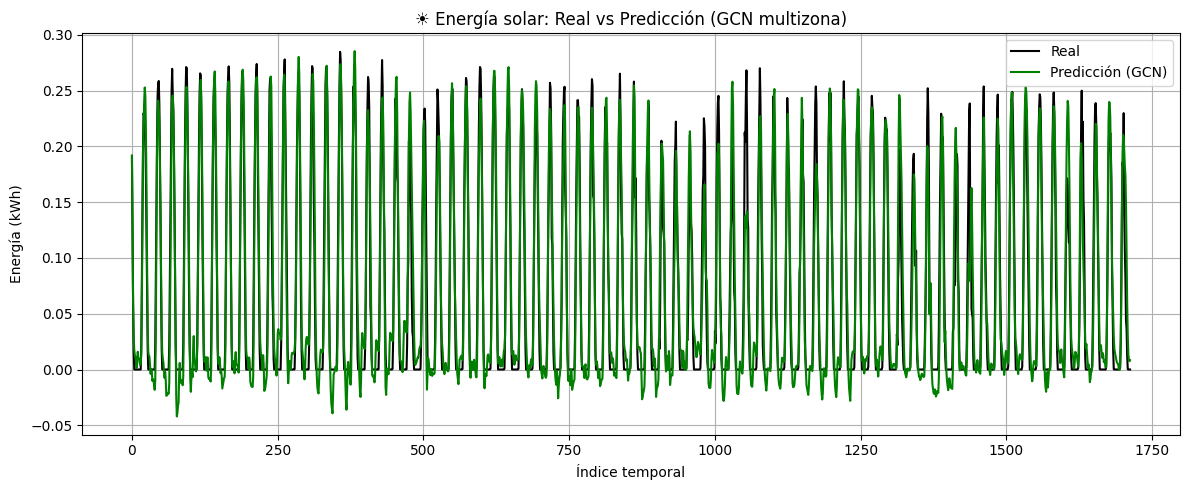

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true_gcn, label='Real', color='black')
plt.plot(y_pred_gcn, label='Predicción (GCN)', color='green')
plt.title("☀️ Energía solar: Real vs Predicción (GCN multizona)")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.2: Dispersión predicho vs real


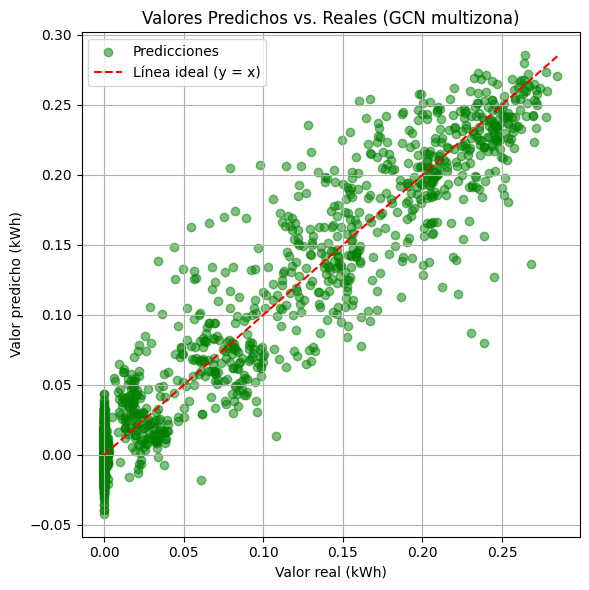

In [ ]:
# Aplanar para la gráfica
y_true_flat = y_true_gcn.ravel()
y_pred_flat = y_pred_gcn.ravel()

plt.figure(figsize=(6, 6))
plt.scatter(y_true_flat, y_pred_flat, color='green', alpha=0.5, label='Predicciones')
plt.plot([0, max(y_true_flat)], [0, max(y_true_flat)], 'r--', label='Línea ideal (y = x)')
plt.xlabel('Valor real (kWh)')
plt.ylabel('Valor predicho (kWh)')
plt.title('Valores Predichos vs. Reales (GCN multizona)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


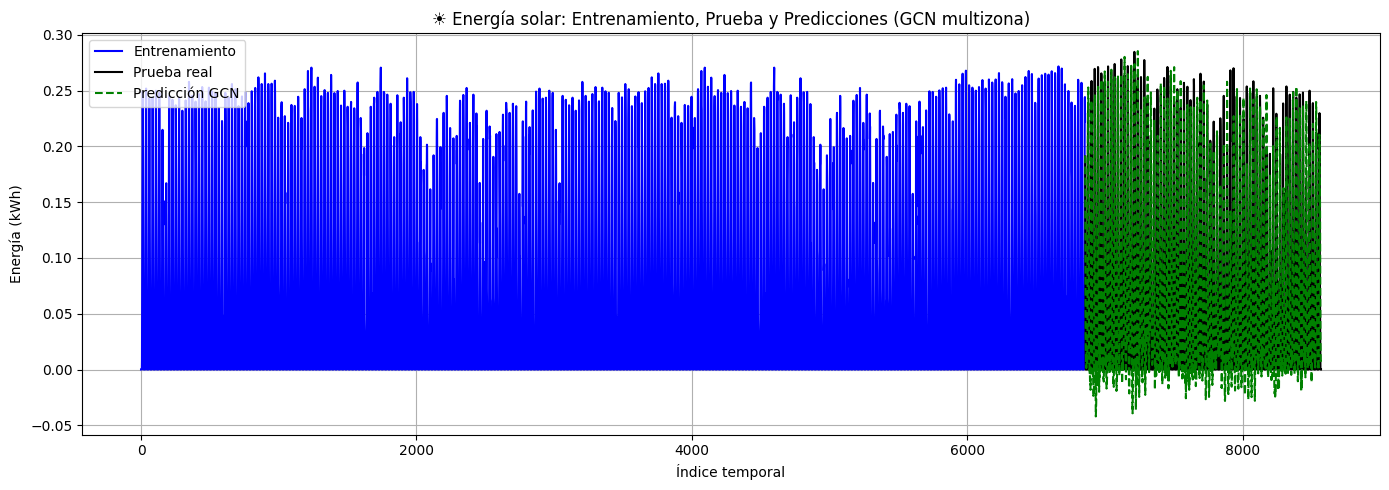

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tamaños
n_total = len(data.y)
n_test = int(n_total * 0.2)
n_train = n_total - n_test

# Obtener todos los valores reales y predichos (como arrays planos)
valores_reales = data.y.detach().numpy().ravel()
valores_predichos = pred.detach().numpy().ravel()

# Crear rango temporal
tiempo = np.arange(n_total)

# Gráfica
plt.figure(figsize=(14, 5))

# Entrenamiento (80%)
plt.plot(tiempo[:n_train], valores_reales[:n_train], color='blue', label='Entrenamiento')

# Prueba (20%)
plt.plot(tiempo[n_train:], valores_reales[n_train:], color='black', label='Prueba real')

# Predicciones sobre prueba
plt.plot(tiempo[n_train:], valores_predichos[n_train:], color='green', linestyle='--', label='Predicción GCN')

# Detalles
plt.title("☀️ Energía solar: Entrenamiento, Prueba y Predicciones (GCN multizona)")
plt.xlabel("Índice temporal")
plt.ylabel("Energía (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🧠 **GNN (Graph Neural Network)**

- Es la familia general de modelos de redes neuronales que trabajan directamente sobre datos estructurados como grafos.
- Sirven para tareas como clasificación de nodos, predicción de enlaces, regresión sobre nodos o grafos completos, etc.
- Las GNN aprenden representaciones (embeddings) de nodos teniendo en cuenta tanto sus atributos como su estructura de conectividad (los vecinos en el grafo).

# **🧩 GCN (Graph Convolutional Network)**
- Es un tipo específico de GNN.
- Aplica una operación de tipo convolución sobre grafos, similar a cómo las CNN aplican convoluciones sobre imágenes.
- Fue propuesto por Kipf & Welling (2017) y es uno de los modelos más populares dentro del campo de las GNN.
- Su idea clave es: para cada nodo, actualizar su representación combinando (promediando/pesando) la información de sus vecinos inmediatos.

| Concepto | Es...                                      | Ejemplo                                      |
| -------- | ------------------------------------------ | -------------------------------------------- |
| **GNN**  | Una **familia de modelos**                 | GCN, GraphSAGE, GAT, GIN, etc.               |
| **GCN**  | Un **modelo específico** dentro de las GNN | Usa convoluciones sobre grafos para aprender |

